In [1]:
from pyspecter.SPECTER import SPECTER
from pyspecter.SpectralEMD_Helper import compute_spectral_representation
from pyspecter.CommonObservables import build_jet_observables

from pyshaper.Shaper import Shaper
from pyshaper.CommonObservables import buildCommmonObservables

# Utils
from pyspecter.utils.data_utils import load_cmsopendata, load_triangles, random_triangles, kT_N
from rikabplotlib.plot_utils import newplot, plot_event


# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

# Necessary GPU nonsense for SHAPER
import torch 
if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU!")
else:  
    dev = "cpu"  
    print("Using CPU!")
device = torch.device(dev) 

2024-07-10 03:14:08.799550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using CPU!


In [2]:
R = 1

num_angles = 180
num_energies = 180
dataset = []
dataset2 = []



for angle in range(num_angles):
    for energy in range(num_energies):

        energy_particle_1 = energy / num_energies
        particle_1 = np.array([energy_particle_1, 0, 0])

        energy_particle_2 = (1 -  energy / num_energies) / 2 
        particle_2 = np.array([energy_particle_2, R, 0])

        energy_particle_3 = (1 - energy / num_energies) / 2
        x_particle_3 = R * np.cos(angle / num_angles *  np.pi)
        y_particle_3 = R * np.sin(angle / num_angles *  np.pi)
        particle_3 = np.array([energy_particle_3, x_particle_3, y_particle_3])

        event = np.array([particle_1, particle_2, particle_3])
        dataset.append(event)


        event2 = np.array(((0.5,0,0), (0.5, R, 0)))
        dataset2.append(event2)


dataset = np.array(dataset)
dataset2 = np.array(dataset2)

[[0.66666667 0.         0.        ]
 [0.16666667 1.         0.        ]
 [0.16666667 0.5        0.8660254 ]]


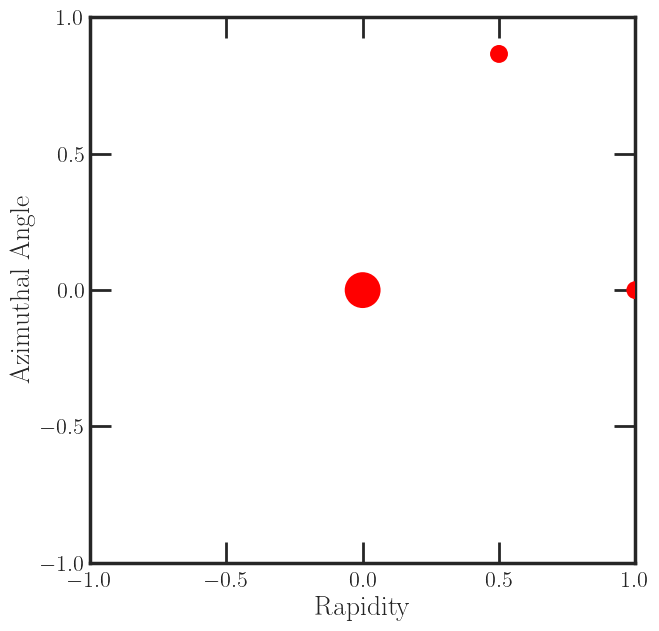

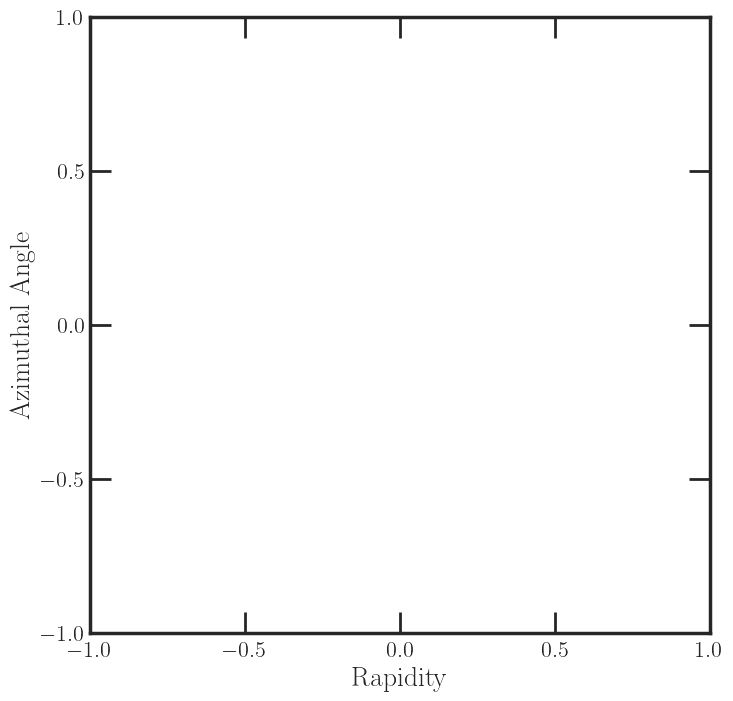

<Axes: xlabel='Rapidity', ylabel='Azimuthal Angle'>

In [3]:
fig, ax = newplot("full")

print(dataset[60*180 + 120])

ax = plot_event(ax, dataset[60*180 + 120], R = R)
plot_event(ax, dataset2[0], R = R)

In [4]:
commonObservables, pointers = buildCommmonObservables(N = 3, beta = 2, R = R, device = device)
_2subjettiness = commonObservables["2-Subjettiness"]

# Collect our observables in one dictionary
observables = {}
observables["2-Subjettiness"] = _2subjettiness


shaper = Shaper(observables, device)
shaper.to(device)


EMDs = np.zeros((num_angles, num_energies))

batch_counter = 0
for angle in tqdm(range(num_angles)):

    batch = dataset[angle*num_energies:(angle+1)*num_energies]
    # batch2 = dataset2[angle*num_energies:(angle+1)*num_energies]

    temp = []
    dataset_emds, dataset_params = shaper.calculate(batch, epochs = 500, verbose=True, lr = 0.01, N = 50, scaling = 0.9, epsilon = 0.001, early_stopping= 25)
    for j in range(num_angles):
        e = dataset_params["2-Subjettiness"][j]["EMD"]
        temp.append(e)

    EMDs[angle] = np.array(temp)

    

  0%|          | 0/180 [00:00<?, ?it/s]

Observable: 2-Subjettiness Epoch 0 Mean Loss = 2.773686218975829e-12 Elapsed time = 0.910s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 4.6336001800126625e-06 Elapsed time = 0.984s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0001739428175217957 Elapsed time = 1.046s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 1.2778018087071056e-05 Elapsed time = 1.132s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 8.739907160715019e-05 Elapsed time = 1.220s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.00011441727102565994 Elapsed time = 1.304s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 5.2142238160336595e-05 Elapsed time = 1.392s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 9.550517404477432e-06 Elapsed time = 1.451s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 8 Mean Loss = 2.6407028649878663e-0

  1%|          | 1/180 [00:15<44:48, 15.02s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 9.81070365166185e-06 Elapsed time = 2.809s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 1.1092264675325068e-05 Elapsed time = 2.902s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 26 Mean Loss = 1.0887742539327721e-05 Elapsed time = 2.937s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 1.6054817991159907e-05 Elapsed time = 0.089s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 5.1637327315903447e-05 Elapsed time = 0.154s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.00017813814370634242 Elapsed time = 0.226s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 5.218349704389564e-05 Elapsed time = 0.311s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 7.934777928413597e-05 Elapsed time = 0.397s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.000155749

  1%|          | 2/180 [00:17<22:20,  7.53s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 4.6293916893268435e-05 Elapsed time = 2.025s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 3.400434776621195e-05 Elapsed time = 2.123s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.00010067740356281737 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0001388932870920851 Elapsed time = 0.165s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.00024099667837920908 Elapsed time = 0.247s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.00013735994020357289 Elapsed time = 0.338s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.00015124717138961487 Elapsed time = 0.439s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.00022210725366878452 Elapsed time = 0.534s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.000199813

  2%|▏         | 3/180 [00:19<15:22,  5.21s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.00012817419615708382 Elapsed time = 2.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.00011661999925409974 Elapsed time = 2.259s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.00020027228644513192 Elapsed time = 0.062s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.00022222631993524072 Elapsed time = 0.161s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0003354726358035502 Elapsed time = 0.249s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.00023088720809028018 Elapsed time = 0.342s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0002535141981853586 Elapsed time = 0.436s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0003194737537948337 Elapsed time = 0.529s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0002939126

  2%|▏         | 4/180 [00:22<12:18,  4.20s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.00022699431089373928 Elapsed time = 2.045s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.00021525704904787644 Elapsed time = 2.128s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0004519645600857479 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.00047268959489075416 Elapsed time = 0.177s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0005772216216428205 Elapsed time = 0.252s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.00047921683152607226 Elapsed time = 0.313s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0005012989421730809 Elapsed time = 0.392s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0005629310292230608 Elapsed time = 0.471s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.00053873276

  3%|▎         | 5/180 [00:24<10:03,  3.45s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.00047395836023093175 Elapsed time = 1.907s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.00046269128166992837 Elapsed time = 1.995s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0007011719537811385 Elapsed time = 0.061s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0007200174545687332 Elapsed time = 0.150s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0008159298074638678 Elapsed time = 0.233s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0007232950723038003 Elapsed time = 0.316s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0007428010573170872 Elapsed time = 0.397s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0008004761106955509 Elapsed time = 0.458s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0007740092596

  3%|▎         | 6/180 [00:26<08:44,  3.02s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.0007120467835597487 Elapsed time = 1.949s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.000701583901374963 Elapsed time = 2.030s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0009969123275216892 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0010147622534330165 Elapsed time = 0.184s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0011051242449967604 Elapsed time = 0.267s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0010166828614375037 Elapsed time = 0.345s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0010350241854515238 Elapsed time = 0.406s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0010904572102137739 Elapsed time = 0.488s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0010636008914540

  4%|▍         | 7/180 [00:29<08:02,  2.79s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.0010037464826988677 Elapsed time = 2.134s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.0009950259189483606 Elapsed time = 2.195s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0014585823070420803 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0014778606874945885 Elapsed time = 0.181s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0015638765895144187 Elapsed time = 0.268s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0014813532988126907 Elapsed time = 0.346s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0014980697373781974 Elapsed time = 0.418s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.001552720009931363 Elapsed time = 0.500s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0015270771663280

  4%|▍         | 8/180 [00:31<07:32,  2.63s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.0014699942294909205 Elapsed time = 2.015s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.0014639249971272268 Elapsed time = 2.098s Percentage done = 0.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0018510176601315227 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0018687739984367606 Elapsed time = 0.154s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0019503332380231262 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.001873113071875802 Elapsed time = 0.329s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0018861055482476431 Elapsed time = 0.419s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0019397536522269042 Elapsed time = 0.479s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0019143892895145

  5%|▌         | 9/180 [00:33<07:16,  2.55s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.0018577702682200147 Elapsed time = 2.054s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.0018551401429350437 Elapsed time = 2.143s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 26 Mean Loss = 0.00185519920172131 Elapsed time = 2.175s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 27 Mean Loss = 0.001855209516118824 Elapsed time = 2.237s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0025124455967266437 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.002514310807681694 Elapsed time = 0.175s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0025840994384553695 Elapsed time = 0.262s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0025022501167970604 Elapsed time = 0.350s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.002505975648657

  6%|▌         | 10/180 [00:36<07:07,  2.51s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.0024436531469594533 Elapsed time = 2.105s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.0024462612378152292 Elapsed time = 2.193s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 26 Mean Loss = 0.002446058058154045 Elapsed time = 2.250s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 27 Mean Loss = 0.0024458226547317786 Elapsed time = 2.288s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0029190962038329517 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0029309020243999838 Elapsed time = 0.151s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0030046636788433213 Elapsed time = 0.235s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0029346150871586156 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.002945354948

  6%|▌         | 11/180 [00:39<07:26,  2.64s/it]

Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.002924487278667382 Elapsed time = 2.711s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.0029245784405955216 Elapsed time = 2.772s Percentage done = 90.556 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.00343111488436989 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0034403061061614912 Elapsed time = 0.177s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0035081551882386623 Elapsed time = 0.241s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0034431415188818293 Elapsed time = 0.329s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0034534642776836537 Elapsed time = 0.418s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.003484505024001313 Elapsed time = 0.509s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.00346739905184626

  7%|▋         | 12/180 [00:43<08:31,  3.04s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.0034294139625368797 Elapsed time = 3.691s Percentage done = 70.000 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.0034293096253046923 Elapsed time = 3.779s Percentage done = 70.000 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.003429238994835436 Elapsed time = 3.818s Percentage done = 78.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.004311582588525198 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.004294258051555112 Elapsed time = 0.173s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.004344608740130853 Elapsed time = 0.252s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.004267562774152288 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.004264094489755937 Elapsed time = 0.403s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.00427499001121355

  7%|▋         | 13/180 [00:47<09:19,  3.35s/it]

Observable: 2-Subjettiness Epoch 46 Mean Loss = 0.0041606537248298995 Elapsed time = 3.403s Percentage done = 71.667 
Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.0041605816744170925 Elapsed time = 3.474s Percentage done = 75.000 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.004160666228805591 Elapsed time = 3.517s Percentage done = 75.556 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.004160593006155169 Elapsed time = 3.573s Percentage done = 83.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.004753900247305864 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0047546574605399254 Elapsed time = 0.185s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.004814005388955896 Elapsed time = 0.276s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.004755213241231912 Elapsed time = 0.364s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.00476771336592

  8%|▊         | 14/180 [00:50<09:39,  3.49s/it]

Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.004737546491378452 Elapsed time = 3.671s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.005564456129852463 Elapsed time = 0.089s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.005536600499524664 Elapsed time = 0.175s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.005571039735675893 Elapsed time = 0.251s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.005500549296266399 Elapsed time = 0.316s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.005491915620061466 Elapsed time = 0.401s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.005483081899001263 Elapsed time = 0.475s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.005450508381424394 Elapsed time = 0.550s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.005426039581248511 Elap

  8%|▊         | 15/180 [00:54<09:55,  3.61s/it]

Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.005352900042069248 Elapsed time = 3.677s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.005352951881812057 Elapsed time = 3.709s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.005352931469032127 Elapsed time = 3.768s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.006013418010722186 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.006009937803860844 Elapsed time = 0.181s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0060582426454251015 Elapsed time = 0.268s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.006008769936225791 Elapsed time = 0.371s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.006022652557132662 Elapsed time = 0.464s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.006024085445743468

  9%|▉         | 16/180 [00:58<09:48,  3.59s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.0059883041019121366 Elapsed time = 3.370s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.005988314563122306 Elapsed time = 3.405s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.006685835075364189 Elapsed time = 0.603s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0066805868666657865 Elapsed time = 1.298s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.006721473523389755 Elapsed time = 2.001s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.00667925714848631 Elapsed time = 2.709s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.006691837590511164 Elapsed time = 3.137s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0066869412147853935 Elapsed time = 3.244s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.006669817745791483 

  9%|▉         | 17/180 [01:05<12:29,  4.60s/it]

Observable: 2-Subjettiness Epoch 44 Mean Loss = 0.0066561982935632435 Elapsed time = 6.023s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 45 Mean Loss = 0.006656202773612879 Elapsed time = 6.058s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 46 Mean Loss = 0.006656198259123711 Elapsed time = 6.119s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.006656173307439733 Elapsed time = 6.153s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.0066561645838899295 Elapsed time = 6.205s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.007609950872130058 Elapsed time = 0.096s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.007602538673765796 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.007634493632293824 Elapsed time = 0.258s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0075975213965

 10%|█         | 18/180 [01:08<11:33,  4.28s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.007571613315990868 Elapsed time = 3.325s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.007571613750608068 Elapsed time = 3.389s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.008810868866324503 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.008741106456121391 Elapsed time = 0.199s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.008735290499559293 Elapsed time = 0.285s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.008656476858070366 Elapsed time = 0.368s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.008628795371623709 Elapsed time = 0.454s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.00858162772864388 Elapsed time = 0.543s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.008537712547452732 Ela

 11%|█         | 19/180 [01:12<11:01,  4.11s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.008305932606082126 Elapsed time = 3.450s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.008307013854533175 Elapsed time = 3.484s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.008307993621242026 Elapsed time = 3.539s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.008308835662319325 Elapsed time = 3.574s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.00908817564118686 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.009073779745813226 Elapsed time = 0.156s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.009095588063226185 Elapsed time = 0.238s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.009067503622403213 Elapsed time = 0.325s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.009077106880269841

 11%|█         | 20/180 [01:15<10:27,  3.92s/it]

Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.009861388967935151 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.009838196916987525 Elapsed time = 0.170s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.00985865464964364 Elapsed time = 0.257s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.00983382461029881 Elapsed time = 0.345s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.009841752744008166 Elapsed time = 0.407s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.009824130059455961 Elapsed time = 0.498s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.00981296929158917 Elapsed time = 0.588s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.009820359681099136 Elapsed time = 0.682s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 8 Mean Loss = 0.009824707274351061 Elapsed time = 

 12%|█▏        | 21/180 [01:19<10:13,  3.86s/it]

Observable: 2-Subjettiness Epoch 46 Mean Loss = 0.009802989017124572 Elapsed time = 3.470s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.009802951888074556 Elapsed time = 3.537s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.009802953886214204 Elapsed time = 3.574s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.010655711893842736 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.010628835094475006 Elapsed time = 0.195s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.010642415139914697 Elapsed time = 0.283s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.010622592628189724 Elapsed time = 0.380s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.01062841666506655 Elapsed time = 0.448s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.010611498876096448 E

 12%|█▏        | 22/180 [01:23<10:11,  3.87s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.01059059593228287 Elapsed time = 3.555s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.010590511908715902 Elapsed time = 3.609s Percentage done = 89.444 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.010590479490929283 Elapsed time = 3.644s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.010590448510225139 Elapsed time = 3.698s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.010590466595992136 Elapsed time = 3.731s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.011942855499283825 Elapsed time = 0.442s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.011862854482266509 Elapsed time = 0.509s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.011820999926163091 Elapsed time = 0.584s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0117662637601218

 13%|█▎        | 23/180 [01:27<10:05,  3.86s/it]

Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.011427284227910504 Elapsed time = 3.661s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.01142766895079856 Elapsed time = 3.695s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.012775467701228789 Elapsed time = 0.080s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.012689834585439206 Elapsed time = 0.147s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.01263848830098545 Elapsed time = 0.234s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.01259188597873112 Elapsed time = 0.322s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.01255191100887411 Elapsed time = 0.411s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.012502724481439347 Elapsed time = 0.493s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.01246460482879128 Elapsed

 13%|█▎        | 24/180 [01:31<10:10,  3.91s/it]

Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.012253583246880832 Elapsed time = 3.840s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.012253867957365907 Elapsed time = 3.893s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.01315299239649903 Elapsed time = 0.083s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.013116542131845361 Elapsed time = 0.158s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.013102498102105327 Elapsed time = 0.220s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.013100098515375672 Elapsed time = 0.299s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0130996175071535 Elapsed time = 0.385s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.013089126246632077 Elapsed time = 0.445s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.013081792433189953 Elaps

 14%|█▍        | 25/180 [01:34<09:47,  3.79s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.013063530092525373 Elapsed time = 3.201s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.013063583646483797 Elapsed time = 3.237s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.013063651383547242 Elapsed time = 3.293s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.0130636963465804 Elapsed time = 3.327s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.01306368823489821 Elapsed time = 3.378s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.014733539935372795 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.014636834081061856 Elapsed time = 0.174s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.01456953993700962 Elapsed time = 0.254s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.014528965031301293 

 14%|█▍        | 26/180 [01:38<09:41,  3.78s/it]

Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.014189003545874988 Elapsed time = 3.526s Percentage done = 86.111 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.014188794826137989 Elapsed time = 3.581s Percentage done = 87.778 
Observable: 2-Subjettiness Epoch 55 Mean Loss = 0.01418862419749429 Elapsed time = 3.613s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.015766611502880955 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.01565247984771203 Elapsed time = 0.143s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.015574399742278425 Elapsed time = 0.231s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.01552227563612784 Elapsed time = 0.328s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.015470502211731704 Elapsed time = 0.404s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.015424001556756493 Ela

 15%|█▌        | 27/180 [01:42<09:40,  3.80s/it]

Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.015062234790416875 Elapsed time = 3.531s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.015062807276990497 Elapsed time = 3.566s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.015063080420966596 Elapsed time = 3.621s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.015063068044724383 Elapsed time = 3.656s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 55 Mean Loss = 0.015063000249614964 Elapsed time = 3.702s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.016035773452151462 Elapsed time = 0.081s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.01598506227876189 Elapsed time = 0.144s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.015950896267895587 Elapsed time = 0.226s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0159501415318421

 16%|█▌        | 28/180 [01:46<09:22,  3.70s/it]

Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.015904795630679775 Elapsed time = 3.228s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.015904859819501224 Elapsed time = 3.277s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.015904844261240215 Elapsed time = 3.309s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.015904810619799214 Elapsed time = 3.342s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.016942231664143038 Elapsed time = 0.089s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0168859269314756 Elapsed time = 0.151s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.01684777847808113 Elapsed time = 0.236s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.01684418500355807 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.016843884443369463 El

 16%|█▌        | 29/180 [01:49<09:08,  3.63s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.016798348068712384 Elapsed time = 3.210s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.01679830540605407 Elapsed time = 3.244s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.016798340303810416 Elapsed time = 3.300s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.016798431049877157 Elapsed time = 3.335s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.018995851438214435 Elapsed time = 0.060s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.01883621193531629 Elapsed time = 0.148s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.01870837209846488 Elapsed time = 0.228s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.018620106033146535 Elapsed time = 0.313s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0185433552947264 Ela

 17%|█▋        | 30/180 [01:53<09:13,  3.69s/it]

Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.017762093104587016 Elapsed time = 3.539s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 55 Mean Loss = 0.017763421579325547 Elapsed time = 3.589s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 56 Mean Loss = 0.017764905393495508 Elapsed time = 3.630s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 57 Mean Loss = 0.0177664439487368 Elapsed time = 3.662s Percentage done = 92.222 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.01878796202234096 Elapsed time = 0.079s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.018723866547063355 Elapsed time = 0.143s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.018672999126526216 Elapsed time = 0.218s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.018665652637072424 Elapsed time = 0.295s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.018667127164695152 E

 17%|█▋        | 31/180 [01:57<09:09,  3.68s/it]

Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.018614093164473565 Elapsed time = 3.439s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.018613969940148915 Elapsed time = 3.491s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.01861396629246883 Elapsed time = 3.525s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.020630735432657983 Elapsed time = 0.065s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.020460068215389683 Elapsed time = 0.157s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.020323601021906747 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.02022716554412101 Elapsed time = 0.324s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.020153109303403957 Elapsed time = 0.413s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.02008794996250395 Ela

 18%|█▊        | 32/180 [02:01<09:26,  3.83s/it]

Observable: 2-Subjettiness Epoch 55 Mean Loss = 0.019371024895210413 Elapsed time = 3.828s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 56 Mean Loss = 0.019372015579251133 Elapsed time = 3.862s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 57 Mean Loss = 0.019373040354872098 Elapsed time = 3.927s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 58 Mean Loss = 0.019374200606883583 Elapsed time = 3.960s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.01937530891179146 Elapsed time = 4.015s Percentage done = 91.111 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.020444550339016133 Elapsed time = 0.080s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.02037170987847882 Elapsed time = 0.160s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.020313699428758505 Elapsed time = 0.243s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.02029424617519705

 18%|█▊        | 33/180 [02:05<09:28,  3.86s/it]

Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.02024281116343142 Elapsed time = 3.328s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.020242817046285683 Elapsed time = 3.362s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.0202427714373496 Elapsed time = 3.401s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.02024265426144767 Elapsed time = 3.456s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.02024252417120604 Elapsed time = 3.490s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.021400509266823065 Elapsed time = 0.076s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.021326309390456624 Elapsed time = 0.139s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.021259626070160367 Elapsed time = 0.217s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.021236280649383037 E

 19%|█▉        | 34/180 [02:08<09:15,  3.81s/it]

Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.021181838778284147 Elapsed time = 3.449s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.021181767154404143 Elapsed time = 3.505s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.02236279491141128 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.022288072640529007 Elapsed time = 0.201s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.022213497343667163 Elapsed time = 0.287s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0221841220451299 Elapsed time = 0.371s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02218394695503068 Elapsed time = 0.452s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.022188263734117048 Elapsed time = 0.512s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.022192379110654453 Elapse

 19%|█▉        | 35/180 [02:12<09:11,  3.80s/it]

Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.022124600708452312 Elapsed time = 3.605s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.022124521302854798 Elapsed time = 3.653s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.024462736109692036 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.024273289542179555 Elapsed time = 0.184s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.024117367195948543 Elapsed time = 0.271s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.02400190679650728 Elapsed time = 0.335s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02391988826566376 Elapsed time = 0.418s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.023851440908523123 Elapsed time = 0.494s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.023790441982984904 Elap

 20%|██        | 36/180 [02:16<09:20,  3.89s/it]

Observable: 2-Subjettiness Epoch 58 Mean Loss = 0.02312901745382179 Elapsed time = 3.923s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.02313003076900107 Elapsed time = 3.973s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.025433907528834728 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.02524076724479932 Elapsed time = 0.187s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.02507778190710168 Elapsed time = 0.270s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.024957060460777333 Elapsed time = 0.353s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.024872473750858465 Elapsed time = 0.421s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.024803562921523633 Elapsed time = 0.498s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.024743983033759933 Elapse

 21%|██        | 37/180 [02:20<09:32,  4.01s/it]

Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.024079332050233562 Elapsed time = 4.006s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.02408031110826414 Elapsed time = 4.070s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.024081201530255687 Elapsed time = 4.104s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.024082018683030684 Elapsed time = 4.152s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.02527758465811429 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.025185231775362305 Elapsed time = 0.173s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.025104126573165155 Elapsed time = 0.238s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.02506019034853024 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02504902717030038 El

 21%|██        | 38/180 [02:24<09:21,  3.96s/it]

Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.024982180830880274 Elapsed time = 3.574s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 53 Mean Loss = 0.024982153744915397 Elapsed time = 3.609s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 54 Mean Loss = 0.024982151613221502 Elapsed time = 3.643s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 55 Mean Loss = 0.024982161376586494 Elapsed time = 3.699s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.027385087892374333 Elapsed time = 0.092s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.027180028536854986 Elapsed time = 0.174s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.027010824686375497 Elapsed time = 0.269s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.026881916618246276 Elapsed time = 0.346s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02678875331103982

 22%|██▏       | 39/180 [02:28<09:27,  4.02s/it]

Observable: 2-Subjettiness Epoch 58 Mean Loss = 0.02598399917413998 Elapsed time = 3.968s Percentage done = 89.444 
Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.025984831403992655 Elapsed time = 4.003s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.025985688034496787 Elapsed time = 4.066s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.028634436738179322 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.02840907229919038 Elapsed time = 0.185s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.028222419486297036 Elapsed time = 0.268s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.028073900923158767 Elapsed time = 0.372s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02796298154684741 Elapsed time = 0.454s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.02787792613121888 Elap

 22%|██▏       | 40/180 [02:33<09:28,  4.06s/it]

Observable: 2-Subjettiness Epoch 57 Mean Loss = 0.02694498512250397 Elapsed time = 3.856s Percentage done = 87.778 
Observable: 2-Subjettiness Epoch 58 Mean Loss = 0.026946100308850873 Elapsed time = 3.891s Percentage done = 88.333 
Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.02694714602888174 Elapsed time = 3.939s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.026948304852865274 Elapsed time = 3.975s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.026949439762554702 Elapsed time = 4.009s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.02943175818719384 Elapsed time = 0.078s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.029206830014946818 Elapsed time = 0.149s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.029010372072257776 Elapsed time = 0.237s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.028858600296856215

 23%|██▎       | 41/180 [02:37<09:30,  4.10s/it]

Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.027725744379373887 Elapsed time = 4.006s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.027726944357467195 Elapsed time = 4.038s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.030415708550976382 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03018807057039036 Elapsed time = 0.154s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.029987507110086478 Elapsed time = 0.233s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.029829465360186682 Elapsed time = 0.320s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.02971067708503041 Elapsed time = 0.403s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.02962052695026311 Elapsed time = 0.466s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.02955008560836884 Elapse

 23%|██▎       | 42/180 [02:41<09:28,  4.12s/it]

Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.028687251246204446 Elapsed time = 4.006s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03139850349721706 Elapsed time = 0.097s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.031159445559994007 Elapsed time = 0.178s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.03095787799651993 Elapsed time = 0.268s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.030802951740689526 Elapsed time = 0.346s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.03068252784756219 Elapsed time = 0.410s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03058715000321778 Elapsed time = 0.495s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.03051212584913527 Elapsed time = 0.576s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.030451172142541814 Elapsed t

 24%|██▍       | 43/180 [02:45<09:21,  4.10s/it]

Observable: 2-Subjettiness Epoch 57 Mean Loss = 0.02964112885318981 Elapsed time = 3.776s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 58 Mean Loss = 0.029642056191773413 Elapsed time = 3.811s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 59 Mean Loss = 0.02964296277221163 Elapsed time = 3.860s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.02964392496295558 Elapsed time = 3.893s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.02964492130219393 Elapsed time = 3.927s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03268435304699879 Elapsed time = 0.091s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03243610341628988 Elapsed time = 0.169s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.032205682862938075 Elapsed time = 0.240s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0320253844870927 Elap

 24%|██▍       | 44/180 [02:50<09:43,  4.29s/it]

Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.030608766875229777 Elapsed time = 4.087s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.03060996168965681 Elapsed time = 4.121s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.030611195826592545 Elapsed time = 4.171s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03366210499370936 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.033396371787724394 Elapsed time = 0.187s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.033172510279756456 Elapsed time = 0.248s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03299888796819788 Elapsed time = 0.332s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.032858826310580805 Elapsed time = 0.420s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.032741762257582095 Ela

 25%|██▌       | 45/180 [02:54<09:40,  4.30s/it]

Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.0315645866159078 Elapsed time = 4.113s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 63 Mean Loss = 0.03156571785204708 Elapsed time = 4.192s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.032795560285255 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03267107564590535 Elapsed time = 0.191s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.032559751538469246 Elapsed time = 0.279s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03248678180566963 Elapsed time = 0.366s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.03244829711556021 Elapsed time = 0.431s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03243021722106884 Elapsed time = 0.510s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.032427165865212576 Elapsed time

 26%|██▌       | 46/180 [02:58<09:12,  4.12s/it]

Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.03234039198432583 Elapsed time = 3.408s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.03234051198135906 Elapsed time = 3.470s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.032340690187346706 Elapsed time = 3.502s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.03234090057311631 Elapsed time = 3.534s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.032341106237597866 Elapsed time = 3.584s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03579816551630049 Elapsed time = 0.091s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.035509293793519546 Elapsed time = 0.170s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.03526038813320661 Elapsed time = 0.244s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03506065782761046 El

 26%|██▌       | 47/180 [03:02<09:18,  4.20s/it]

Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.0333365079529661 Elapsed time = 4.264s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03710984035003801 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.036801378362482255 Elapsed time = 0.186s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.036529674496462876 Elapsed time = 0.278s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03630926329868897 Elapsed time = 0.370s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.036130146270281535 Elapsed time = 0.461s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03597965295258392 Elapsed time = 0.551s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.03585532489927977 Elapsed time = 0.616s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.03575448673655046 Elapsed tim

 27%|██▋       | 48/180 [03:07<09:32,  4.34s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.03429140829652574 Elapsed time = 4.465s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.03429269323193391 Elapsed time = 4.512s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.038074869425165365 Elapsed time = 0.098s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03776651718314194 Elapsed time = 0.200s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.03749006312605666 Elapsed time = 0.290s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03725931751412443 Elapsed time = 0.390s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.03707395698341619 Elapsed time = 0.480s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03692217931756103 Elapsed time = 0.558s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.03679866266773186 Elapsed ti

 27%|██▋       | 49/180 [03:12<09:43,  4.46s/it]

Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.03523266552624086 Elapsed time = 4.528s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.035233660116662374 Elapsed time = 4.572s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03892537787032779 Elapsed time = 0.098s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03860908746816373 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.038331312781439114 Elapsed time = 0.245s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03810151208260019 Elapsed time = 0.328s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.037913381243642005 Elapsed time = 0.408s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03775695471542551 Elapsed time = 0.488s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.03762926411388132 Elapsed 

 28%|██▊       | 50/180 [03:16<09:35,  4.42s/it]

Observable: 2-Subjettiness Epoch 60 Mean Loss = 0.03605418115427407 Elapsed time = 4.075s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 61 Mean Loss = 0.036055463306062546 Elapsed time = 4.112s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 62 Mean Loss = 0.036056709808892466 Elapsed time = 4.146s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 63 Mean Loss = 0.036057913595060304 Elapsed time = 4.195s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.03605906496846324 Elapsed time = 4.228s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.03988364610898619 Elapsed time = 0.080s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.03956233571451675 Elapsed time = 0.148s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.03927943996354265 Elapsed time = 0.236s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03904806606587954 El

 28%|██▊       | 51/180 [03:20<09:29,  4.42s/it]

Observable: 2-Subjettiness Epoch 63 Mean Loss = 0.036985614917810175 Elapsed time = 4.229s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04121115136238384 Elapsed time = 0.092s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04086831046928031 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0405651423200551 Elapsed time = 0.247s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.04031265260839266 Elapsed time = 0.330s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.04010346862972559 Elapsed time = 0.422s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.03992615099478927 Elapsed time = 0.513s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.03977910423289156 Elapsed time = 0.599s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.03965960404570473 Elapsed time 

 29%|██▉       | 52/180 [03:25<09:26,  4.43s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.03792279433627199 Elapsed time = 4.235s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.03792396101440924 Elapsed time = 4.296s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04207394547799292 Elapsed time = 0.068s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04172701663272973 Elapsed time = 0.167s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.041420757061375 Elapsed time = 0.249s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.041165222652812694 Elapsed time = 0.333s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.04095081924072777 Elapsed time = 0.417s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.04077093355493465 Elapsed time = 0.480s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.040623106069203156 Elapsed tim

 29%|██▉       | 53/180 [03:30<09:43,  4.60s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.038754321099258957 Elapsed time = 4.322s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.03875526303891093 Elapsed time = 4.357s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.0387561611753578 Elapsed time = 4.421s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.038757009848227934 Elapsed time = 4.454s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 68 Mean Loss = 0.038757808664296234 Elapsed time = 4.508s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04028422459280894 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04013210093382642 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.03999938323815715 Elapsed time = 0.240s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.03990259936965433 Ela

 30%|███       | 54/180 [03:34<09:10,  4.37s/it]

Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.039662124406701575 Elapsed time = 3.703s Percentage done = 91.111 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04394265730516054 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0435859806693366 Elapsed time = 0.166s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0432744069044323 Elapsed time = 0.259s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.043013035882419594 Elapsed time = 0.345s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.04279399844688467 Elapsed time = 0.408s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.04260984526093428 Elapsed time = 0.492s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.04245653433544147 Elapsed time = 0.575s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.04233151485160407 Elapsed time 

 31%|███       | 55/180 [03:38<09:11,  4.41s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.04056842188292649 Elapsed time = 4.298s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.04056934888002514 Elapsed time = 4.357s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.04057019516250067 Elapsed time = 4.390s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04481313826981932 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04446267458649042 Elapsed time = 0.183s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.04413971668562024 Elapsed time = 0.251s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.04386808864138503 Elapsed time = 0.339s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.04364429637595701 Elapsed time = 0.425s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.043459301197759086 Elapsed 

 31%|███       | 56/180 [03:43<09:14,  4.47s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.041410512442234905 Elapsed time = 4.381s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.04141131148595984 Elapsed time = 4.416s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.041412038228008895 Elapsed time = 4.448s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04300592553530199 Elapsed time = 0.098s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04284067553461581 Elapsed time = 0.180s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.04270604979699581 Elapsed time = 0.245s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.04260252460307028 Elapsed time = 0.324s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.042531078360884246 Elapsed time = 0.416s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.042478318653431615 Elaps

 32%|███▏      | 57/180 [03:46<08:39,  4.22s/it]

Observable: 2-Subjettiness Epoch 47 Mean Loss = 0.04232583720262887 Elapsed time = 3.298s Percentage done = 50.000 
Observable: 2-Subjettiness Epoch 48 Mean Loss = 0.04232256211883699 Elapsed time = 3.341s Percentage done = 58.889 
Observable: 2-Subjettiness Epoch 49 Mean Loss = 0.042320005904831405 Elapsed time = 3.398s Percentage done = 70.556 
Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.042318575628774446 Elapsed time = 3.435s Percentage done = 85.556 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.04231780005955241 Elapsed time = 3.483s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04391148385119676 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.043743677488075464 Elapsed time = 0.174s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.04360662112271206 Elapsed time = 0.240s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.043502869508099846 E

 32%|███▏      | 58/180 [03:50<08:12,  4.04s/it]

Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.043203636602912515 Elapsed time = 3.430s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.04320196082634437 Elapsed time = 3.487s Percentage done = 88.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.044787136285514055 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.044625350242454766 Elapsed time = 0.183s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.044477139182466395 Elapsed time = 0.267s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.044365839210675204 Elapsed time = 0.331s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.044288690358452086 Elapsed time = 0.410s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.04423370714131225 Elapsed time = 0.491s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.04419612143440948 Elaps

 33%|███▎      | 59/180 [03:54<07:58,  3.95s/it]

Observable: 2-Subjettiness Epoch 50 Mean Loss = 0.04405418925711678 Elapsed time = 3.535s Percentage done = 68.333 
Observable: 2-Subjettiness Epoch 51 Mean Loss = 0.04405266983149987 Elapsed time = 3.582s Percentage done = 83.889 
Observable: 2-Subjettiness Epoch 52 Mean Loss = 0.04405199411816688 Elapsed time = 3.616s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.04880605190280928 Elapsed time = 0.079s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.04840964351444402 Elapsed time = 0.146s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.04806503074942157 Elapsed time = 0.236s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.047776143363120756 Elapsed time = 0.316s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.04753051484488727 Elapsed time = 0.396s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.047318365597230794 Elapsed

 33%|███▎      | 60/180 [03:58<08:16,  4.13s/it]

Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.04488437057007104 Elapsed time = 4.353s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.04488504516840395 Elapsed time = 4.406s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05157689242882447 Elapsed time = 0.091s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05146490258242314 Elapsed time = 0.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05132347160639862 Elapsed time = 0.274s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05123168861803909 Elapsed time = 0.351s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05115919610640655 Elapsed time = 0.411s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05110834644098456 Elapsed time = 0.485s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05107365267985087 Elapsed tim

 34%|███▍      | 61/180 [04:03<08:48,  4.44s/it]

Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.050610018560675804 Elapsed time = 4.892s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05061006631133043 Elapsed time = 4.942s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05061010232182323 Elapsed time = 4.977s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.05061012202188269 Elapsed time = 5.011s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06846564357143102 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06765603500082054 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06696874948813476 Elapsed time = 0.244s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06638171740600632 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06582509214834621 Elapse

 34%|███▍      | 62/180 [04:09<09:24,  4.78s/it]

Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05618209619618331 Elapsed time = 5.252s Percentage done = 82.778 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.056183410932620366 Elapsed time = 5.301s Percentage done = 86.667 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.056184390796503676 Elapsed time = 5.336s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.05618519531821625 Elapsed time = 5.389s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.056185890788846234 Elapsed time = 5.426s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057218412053124564 Elapsed time = 0.076s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057146998141737036 Elapsed time = 0.180s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05706073068625604 Elapsed time = 0.262s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05701891365073 Ela

 35%|███▌      | 63/180 [04:14<09:26,  4.84s/it]

Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.05663491833773959 Elapsed time = 4.697s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.0566349610621627 Elapsed time = 4.748s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05663499109343522 Elapsed time = 4.781s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.0566350135486573 Elapsed time = 4.830s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 90 Mean Loss = 0.05663503260843249 Elapsed time = 4.863s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05723081577970232 Elapsed time = 0.092s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057165509758568885 Elapsed time = 0.176s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05708315440181953 Elapsed time = 0.238s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05704811351735973 Elapse

 36%|███▌      | 64/180 [04:20<09:47,  5.06s/it]

Observable: 2-Subjettiness Epoch 93 Mean Loss = 0.05679758577090171 Elapsed time = 5.078s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06893190315006198 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06821468212227855 Elapsed time = 0.187s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06754217240247978 Elapsed time = 0.271s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06695340201517361 Elapsed time = 0.359s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0664027064327254 Elapsed time = 0.422s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06589478278248054 Elapsed time = 0.499s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06542951063472881 Elapsed time = 0.574s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.0650013561748589 Elapsed time = 

 36%|███▌      | 65/180 [04:25<09:49,  5.13s/it]

Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05697135432468106 Elapsed time = 5.136s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06907695955726215 Elapsed time = 0.089s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06838373390233352 Elapsed time = 0.178s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0676868191997831 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0670750607839889 Elapsed time = 0.318s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06651583354299268 Elapsed time = 0.403s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06601139739310989 Elapsed time = 0.478s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0655556097801309 Elapsed time = 0.540s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06513838714195622 Elapsed time = 0

 37%|███▋      | 66/180 [04:30<09:43,  5.12s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05707941816718731 Elapsed time = 4.831s Percentage done = 89.444 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.057079871665660496 Elapsed time = 4.890s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05708022055106186 Elapsed time = 4.924s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.057080373887179625 Elapsed time = 4.969s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05726538266624427 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05719876571610156 Elapsed time = 0.175s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05712813479088557 Elapsed time = 0.239s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057106635075372954 Elapsed time = 0.321s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05709017483232957 Elap

 37%|███▋      | 67/180 [04:33<08:19,  4.42s/it]

Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05702188411766353 Elapsed time = 2.564s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05702095981040556 Elapsed time = 2.601s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05702013714374819 Elapsed time = 2.634s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06935430447079448 Elapsed time = 0.091s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06861574221531758 Elapsed time = 0.168s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06788219282041408 Elapsed time = 0.233s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06722226494974974 Elapsed time = 0.308s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06664135500581728 Elapsed time = 0.395s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0661212082240834 Elapsed ti

 38%|███▊      | 68/180 [04:38<08:34,  4.59s/it]

Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05729484904376376 Elapsed time = 4.832s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06948712342936132 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06877283664653078 Elapsed time = 0.162s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06806472120677225 Elapsed time = 0.258s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06743872912548897 Elapsed time = 0.338s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06687385327273256 Elapsed time = 0.418s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0663655906320653 Elapsed time = 0.494s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06590807868439394 Elapsed time = 0.559s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06548963748953408 Elapsed time =

 38%|███▊      | 69/180 [04:43<08:50,  4.78s/it]

Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05729945463083115 Elapsed time = 4.928s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.05729986698845298 Elapsed time = 4.962s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05730023719564391 Elapsed time = 5.010s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.057300579306320286 Elapsed time = 5.042s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05730088330294368 Elapsed time = 5.076s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05729490551812988 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05720538458942125 Elapsed time = 0.164s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05716083962082242 Elapsed time = 0.232s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05715397854801267 Elap

 39%|███▉      | 70/180 [04:46<07:41,  4.19s/it]

Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.057121494193173326 Elapsed time = 2.532s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.057121087936037734 Elapsed time = 2.589s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.057120846393000746 Elapsed time = 2.622s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.05712073737845963 Elapsed time = 2.676s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05730340283027747 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057205760971798254 Elapsed time = 0.182s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057174700702954495 Elapsed time = 0.263s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05717031600393562 Elapsed time = 0.326s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05715348516823724 El

 39%|███▉      | 71/180 [04:49<06:56,  3.82s/it]

Observable: 2-Subjettiness Epoch 42 Mean Loss = 0.057139983021059174 Elapsed time = 2.806s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05731114379013889 Elapsed time = 0.061s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05721574185235012 Elapsed time = 0.146s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05718308890160794 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0571809072047472 Elapsed time = 0.321s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0571661891312235 Elapsed time = 0.398s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05715176131084768 Elapsed time = 0.455s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.057145076933213405 Elapsed time = 0.526s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.057146031588005526 Elapsed time

 40%|████      | 72/180 [04:53<07:20,  4.08s/it]

Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.05716092695883061 Elapsed time = 4.411s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05716124607133679 Elapsed time = 4.443s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 42 Mean Loss = 0.05716149351339684 Elapsed time = 4.487s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 43 Mean Loss = 0.057161618331317894 Elapsed time = 4.519s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06998366864023006 Elapsed time = 0.209s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0692205097190001 Elapsed time = 0.290s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06852127292529783 Elapsed time = 0.353s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06789101220589752 Elapsed time = 0.429s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06731129037410331 Elapsed

 41%|████      | 73/180 [04:59<08:14,  4.62s/it]

Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05747279978822917 Elapsed time = 5.410s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05732417078818091 Elapsed time = 0.096s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057218021490714616 Elapsed time = 0.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0572086628461774 Elapsed time = 0.287s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05719825204513553 Elapsed time = 0.373s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.057191209653521785 Elapsed time = 0.455s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05718680755493955 Elapsed time = 0.513s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05717143839703769 Elapsed time = 0.593s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05717401830867554 Elapsed time

 41%|████      | 74/180 [05:02<07:07,  4.03s/it]

Observable: 2-Subjettiness Epoch 32 Mean Loss = 0.05718934051951186 Elapsed time = 2.404s Percentage done = 87.222 
Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05718889408486171 Elapsed time = 2.453s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.0571885076066893 Elapsed time = 2.486s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.057188232224952014 Elapsed time = 2.521s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05732938574122575 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05722488557350718 Elapsed time = 0.183s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057215621158118464 Elapsed time = 0.260s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057208512088335634 Elapsed time = 0.321s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0572045076386227 Elapse

 42%|████▏     | 75/180 [05:04<06:14,  3.56s/it]

Observable: 2-Subjettiness Epoch 32 Mean Loss = 0.05720040248577586 Elapsed time = 2.311s Percentage done = 90.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057333665755059986 Elapsed time = 0.067s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057231354149472384 Elapsed time = 0.154s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05722251262696874 Elapsed time = 0.241s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05721791905299243 Elapsed time = 0.317s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05721665228354848 Elapsed time = 0.378s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05721410801634193 Elapsed time = 0.456s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05719914901872269 Elapsed time = 0.531s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.057202328621254614 Elapsed ti

 42%|████▏     | 76/180 [05:08<06:02,  3.49s/it]

Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.05720758710198829 Elapsed time = 2.979s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.057207824516808614 Elapsed time = 3.025s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05720790959829982 Elapsed time = 3.064s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 42 Mean Loss = 0.057207826420845875 Elapsed time = 3.124s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 43 Mean Loss = 0.057207601516792134 Elapsed time = 3.158s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0704307200632886 Elapsed time = 0.079s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0696148792145929 Elapsed time = 0.142s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06889874698438993 Elapsed time = 0.225s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0682350890012458 Elaps

 43%|████▎     | 77/180 [05:13<06:46,  3.94s/it]

Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05762128960729266 Elapsed time = 4.800s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.057619514299504876 Elapsed time = 4.832s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05733932986881377 Elapsed time = 0.082s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05724086264575211 Elapsed time = 0.147s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057235095113153674 Elapsed time = 0.225s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05723616405416073 Elapsed time = 0.313s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05723994038999081 Elapsed time = 0.407s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05723924313206226 Elapsed time = 0.483s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.057225042613249066 Elapsed 

 43%|████▎     | 78/180 [05:15<06:02,  3.55s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05722167166467342 Elapsed time = 2.397s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05722169728639225 Elapsed time = 2.430s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05722179259173572 Elapsed time = 2.482s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07063760985102918 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06983422548639484 Elapsed time = 0.191s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0691114480374381 Elapsed time = 0.275s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06842726626006576 Elapsed time = 0.355s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06779545575845987 Elapsed time = 0.420s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0672014583238504 Elapsed tim

 44%|████▍     | 79/180 [05:20<06:41,  3.98s/it]

Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.05767509145468163 Elapsed time = 4.707s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05767540297173481 Elapsed time = 4.761s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05767573998633048 Elapsed time = 4.795s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05767598059869165 Elapsed time = 4.830s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057340878931184606 Elapsed time = 0.119s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05724679916359795 Elapsed time = 0.196s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057244599234157555 Elapsed time = 0.260s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05725223258680975 Elapsed time = 0.337s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05726132462473793 Elaps

 44%|████▍     | 80/180 [05:23<06:01,  3.62s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.057229348726104946 Elapsed time = 2.447s Percentage done = 88.333 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05722905828798604 Elapsed time = 2.505s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.057228890929319376 Elapsed time = 2.541s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05722884565669422 Elapsed time = 2.593s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.057228918217070816 Elapsed time = 2.625s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05734004959748644 Elapsed time = 0.060s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057249213997015935 Elapsed time = 0.152s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05724867998441267 Elapsed time = 0.234s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05725909666313479 E

 45%|████▌     | 81/180 [05:26<05:30,  3.34s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05723564289898301 Elapsed time = 2.364s Percentage done = 87.222 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05723508653722496 Elapsed time = 2.421s Percentage done = 88.333 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05723455397593272 Elapsed time = 2.457s Percentage done = 89.444 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.057234171233398634 Elapsed time = 2.515s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.070928851623709 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07002762246411294 Elapsed time = 0.197s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06920039130297179 Elapsed time = 0.277s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0684474145702552 Elapsed time = 0.361s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0677707528656659 Elapsed ti

 46%|████▌     | 82/180 [05:31<06:20,  3.88s/it]

Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05775091954920855 Elapsed time = 4.959s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.05775103064564367 Elapsed time = 4.994s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05775105889576177 Elapsed time = 5.026s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05733506659097556 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057248476965145935 Elapsed time = 0.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05725442733253456 Elapsed time = 0.249s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05727296953943248 Elapsed time = 0.323s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05729106333261977 Elapsed time = 0.405s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05729542122895105 Elapsed 

 46%|████▌     | 83/180 [05:34<05:40,  3.51s/it]

Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.057245894661173226 Elapsed time = 2.409s Percentage done = 85.556 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.057245018100365995 Elapsed time = 2.446s Percentage done = 87.778 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05724450539694064 Elapsed time = 2.496s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05733088768902235 Elapsed time = 0.085s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057246866498866844 Elapsed time = 0.149s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05725692780817755 Elapsed time = 0.230s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057279774880347155 Elapsed time = 0.301s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05730091347423796 Elapsed time = 0.378s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05730491174876483 Elaps

 47%|████▋     | 84/180 [05:36<05:19,  3.33s/it]

Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05725108369305316 Elapsed time = 2.406s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07119873873889446 Elapsed time = 0.096s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07021847747964785 Elapsed time = 0.186s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06932267061977958 Elapsed time = 0.270s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06850784586341534 Elapsed time = 0.333s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06777034397237003 Elapsed time = 0.405s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0671026149538294 Elapsed time = 0.484s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06649537773078515 Elapsed time = 0.560s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06593926153792483 Elapsed time =

 47%|████▋     | 85/180 [05:41<05:55,  3.74s/it]

Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05777784388887489 Elapsed time = 4.583s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0712842298969109 Elapsed time = 0.087s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0702595952937069 Elapsed time = 0.172s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06934865932885764 Elapsed time = 0.259s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06853028028530793 Elapsed time = 0.322s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06779033340668926 Elapsed time = 0.395s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06711531897890381 Elapsed time = 0.466s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06649749205292513 Elapsed time = 0.525s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06592896126805702 Elapsed time = 

 48%|████▊     | 86/180 [05:46<06:14,  3.99s/it]

Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.05778344117570668 Elapsed time = 4.369s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.057783873982003166 Elapsed time = 4.407s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05778407556160043 Elapsed time = 4.451s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07136757846908748 Elapsed time = 0.097s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07028806237633237 Elapsed time = 0.189s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0693577804783773 Elapsed time = 0.266s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06852690193724507 Elapsed time = 0.334s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06778085011497346 Elapsed time = 0.417s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0671050072570021 Elapsed ti

 48%|████▊     | 87/180 [05:51<06:36,  4.26s/it]

Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.057772371237580146 Elapsed time = 4.623s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05777262314998855 Elapsed time = 4.666s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05777291070100748 Elapsed time = 4.702s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05777310884505924 Elapsed time = 4.749s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05730265177165469 Elapsed time = 0.101s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05722944996216231 Elapsed time = 0.175s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057265219598128976 Elapsed time = 0.244s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05731044352416777 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05733493448674886 Elaps

 49%|████▉     | 88/180 [05:53<05:44,  3.74s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.057251896049516894 Elapsed time = 2.331s Percentage done = 78.333 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05725090302682171 Elapsed time = 2.388s Percentage done = 88.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07152804507123721 Elapsed time = 0.081s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07041772198151901 Elapsed time = 0.177s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06943153736259168 Elapsed time = 0.245s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06855836238763813 Elapsed time = 0.309s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0677800871787541 Elapsed time = 0.382s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06707383871673503 Elapsed time = 0.456s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06642948804267992 Elapsed tim

 49%|████▉     | 89/180 [05:58<06:11,  4.09s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05774948791432608 Elapsed time = 4.720s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05775028827225065 Elapsed time = 4.765s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07160526450995046 Elapsed time = 0.096s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07047289515483296 Elapsed time = 0.193s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0694854008512468 Elapsed time = 0.277s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06859267668850307 Elapsed time = 0.348s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06778627108950686 Elapsed time = 0.471s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06705082181142644 Elapsed time = 0.534s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06637920054490679 Elapsed time

 50%|█████     | 90/180 [06:03<06:39,  4.44s/it]

Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.05772497191145602 Elapsed time = 5.137s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.06628978303245579 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.06554480631602928 Elapsed time = 0.200s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06491127926500566 Elapsed time = 0.301s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0643609098960749 Elapsed time = 0.392s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06383344618661795 Elapsed time = 0.484s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0633645696255068 Elapsed time = 0.563s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06293656574626867 Elapsed time = 0.625s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06254011383538859 Elapsed time = 

 51%|█████     | 91/180 [06:09<07:18,  4.92s/it]

Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.05740865942207165 Elapsed time = 5.737s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05740920227965236 Elapsed time = 5.795s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05740970606307706 Elapsed time = 5.832s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05741019444863519 Elapsed time = 5.892s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07175391239256391 Elapsed time = 0.073s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07057922839497527 Elapsed time = 0.167s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0695597209831855 Elapsed time = 0.248s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06864141574414033 Elapsed time = 0.334s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06780974221700388 Elapsed 

 51%|█████     | 92/180 [06:15<07:31,  5.13s/it]

Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.057696862137203826 Elapsed time = 5.415s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05769744349979899 Elapsed time = 5.451s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07182543114694352 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07064650416788128 Elapsed time = 0.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06961806342911182 Elapsed time = 0.279s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0686863684729259 Elapsed time = 0.361s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06783910772129376 Elapsed time = 0.424s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06706583201755872 Elapsed time = 0.508s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06635796969575393 Elapsed tim

 52%|█████▏    | 93/180 [06:21<07:40,  5.29s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05769759933334879 Elapsed time = 4.991s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05769872006623902 Elapsed time = 5.028s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05769974584561876 Elapsed time = 5.087s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.05770067311176616 Elapsed time = 5.125s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05770146614328648 Elapsed time = 5.183s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057226417192982305 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05728939356243548 Elapsed time = 0.177s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05724107745207018 Elapsed time = 0.263s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057219981415093775 Ela

 52%|█████▏    | 94/180 [06:23<06:18,  4.40s/it]

Observable: 2-Subjettiness Epoch 28 Mean Loss = 0.05720063962960719 Elapsed time = 2.095s Percentage done = 83.889 
Observable: 2-Subjettiness Epoch 29 Mean Loss = 0.05720072161186383 Elapsed time = 2.147s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 30 Mean Loss = 0.05720074199748019 Elapsed time = 2.186s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07196307874465775 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.070761284199802 Elapsed time = 0.181s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06971459198975935 Elapsed time = 0.261s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06876058323671007 Elapsed time = 0.338s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06789394234268305 Elapsed time = 0.401s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06710371483350172 Elapsed tim

 53%|█████▎    | 95/180 [06:28<06:19,  4.47s/it]

Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.057702532777976656 Elapsed time = 4.513s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0720292880691381 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07078736479678709 Elapsed time = 0.136s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06969884995164143 Elapsed time = 0.226s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0687220584853397 Elapsed time = 0.305s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06784366414067336 Elapsed time = 0.367s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0670505964391244 Elapsed time = 0.438s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06633474784321151 Elapsed time = 0.512s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06568729610880837 Elapsed time = 

 53%|█████▎    | 96/180 [06:32<06:21,  4.54s/it]

Observable: 2-Subjettiness Epoch 74 Mean Loss = 0.057684700208483264 Elapsed time = 4.350s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 75 Mean Loss = 0.05768651639098405 Elapsed time = 4.396s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.05768807754631982 Elapsed time = 4.431s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.057689418650827266 Elapsed time = 4.465s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05769050991253203 Elapsed time = 4.514s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05769137876405794 Elapsed time = 4.546s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07209381158722358 Elapsed time = 0.063s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07083329159067944 Elapsed time = 0.158s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06974928600118599 E

 54%|█████▍    | 97/180 [06:37<06:29,  4.69s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05768712225965121 Elapsed time = 4.823s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05768832690470541 Elapsed time = 4.856s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05768932098807353 Elapsed time = 4.900s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05715513648659301 Elapsed time = 0.098s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057205346766083194 Elapsed time = 0.197s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0572141439640998 Elapsed time = 0.281s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05721021869491475 Elapsed time = 0.343s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05718937219676769 Elapsed time = 0.421s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057157685182109064 Elapsed 

 54%|█████▍    | 98/180 [06:40<05:28,  4.01s/it]

Observable: 2-Subjettiness Epoch 28 Mean Loss = 0.05715245367351195 Elapsed time = 2.200s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 29 Mean Loss = 0.0571525892326867 Elapsed time = 2.237s Percentage done = 87.222 
Observable: 2-Subjettiness Epoch 30 Mean Loss = 0.057152706863901885 Elapsed time = 2.299s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0571351246332698 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057181771554880675 Elapsed time = 0.192s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057200586449147925 Elapsed time = 0.271s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05720390475277479 Elapsed time = 0.347s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05718355950537241 Elapsed time = 0.413s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057148529364106554 Elapsed

 55%|█████▌    | 99/180 [06:42<04:45,  3.53s/it]

Observable: 2-Subjettiness Epoch 28 Mean Loss = 0.05713785051678618 Elapsed time = 2.159s Percentage done = 79.444 
Observable: 2-Subjettiness Epoch 29 Mean Loss = 0.05713812000014716 Elapsed time = 2.196s Percentage done = 84.444 
Observable: 2-Subjettiness Epoch 30 Mean Loss = 0.05713835833594203 Elapsed time = 2.231s Percentage done = 89.444 
Observable: 2-Subjettiness Epoch 31 Mean Loss = 0.0571384127665725 Elapsed time = 2.282s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07227764600991375 Elapsed time = 0.095s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07096948525739005 Elapsed time = 0.158s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06985541817072469 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06886634269612842 Elapsed time = 0.326s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06797136759075026 Elapsed 

 56%|█████▌    | 100/180 [06:47<05:19,  4.00s/it]

Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.057670753565616906 Elapsed time = 4.904s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057092875538445595 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057133193598646256 Elapsed time = 0.193s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05716492696794578 Elapsed time = 0.286s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05718292538076639 Elapsed time = 0.378s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05716767068758297 Elapsed time = 0.462s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057130179173287214 Elapsed time = 0.522s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05709565653362208 Elapsed time = 0.608s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05707835102156322 Elapsed t

 56%|█████▌    | 101/180 [06:51<04:59,  3.79s/it]

Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05709532786665174 Elapsed time = 3.171s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0570707588779947 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05710829056980502 Elapsed time = 0.195s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05714451264615895 Elapsed time = 0.291s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05716837159125134 Elapsed time = 0.382s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05715651853242889 Elapsed time = 0.470s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057119539566338064 Elapsed time = 0.553s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.057083217719466325 Elapsed time = 0.615s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.057062663766555485 Elapsed tim

 57%|█████▋    | 102/180 [06:53<04:32,  3.49s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.057070367621620086 Elapsed time = 2.592s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.0570700468430813 Elapsed time = 2.656s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07244764735482426 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07109580869631221 Elapsed time = 0.212s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.06996801563396325 Elapsed time = 0.302s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06896527615414622 Elapsed time = 0.394s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06805438273586333 Elapsed time = 0.486s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06722224666219619 Elapsed time = 0.577s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.066464117281915 Elapsed time 

 57%|█████▋    | 103/180 [06:59<05:12,  4.06s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05766318654124108 Elapsed time = 5.207s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05766411637369957 Elapsed time = 5.261s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05702489384049032 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.057055887090973555 Elapsed time = 0.184s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0570973174361926 Elapsed time = 0.268s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057133050113528344 Elapsed time = 0.353s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05713071295111957 Elapsed time = 0.441s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0570972744634168 Elapsed time = 0.499s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05705906306264094 Elapsed tim

 58%|█████▊    | 104/180 [07:02<04:45,  3.76s/it]

Observable: 2-Subjettiness Epoch 31 Mean Loss = 0.05702709469737278 Elapsed time = 2.467s Percentage done = 86.111 
Observable: 2-Subjettiness Epoch 32 Mean Loss = 0.057026317301723695 Elapsed time = 2.521s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05702529560981525 Elapsed time = 2.562s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.057024476470218764 Elapsed time = 2.596s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07255376117019396 Elapsed time = 0.103s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07108465675523298 Elapsed time = 0.197s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0698641758890719 Elapsed time = 0.280s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06879101250087842 Elapsed time = 0.374s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06782691476918343 Elapse

 58%|█████▊    | 105/180 [07:08<05:25,  4.34s/it]

Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05697733618112074 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05700253087432227 Elapsed time = 0.159s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.057046118480826004 Elapsed time = 0.238s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05708941742260423 Elapsed time = 0.316s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05709642103498077 Elapsed time = 0.415s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057069343558719586 Elapsed time = 0.507s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05703274172782484 Elapsed time = 0.597s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.057003996186217085 Elapsed time = 0.656s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 8 Mean Loss = 0.056986858843204875 Elapsed time = 0.

 59%|█████▉    | 106/180 [07:10<04:44,  3.85s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05698547843882504 Elapsed time = 2.521s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056984788701326276 Elapsed time = 2.555s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05695313547750831 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05697496075105543 Elapsed time = 0.207s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05701960638527655 Elapsed time = 0.290s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05706579990478026 Elapsed time = 0.369s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.057076917820894676 Elapsed time = 0.434s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05705339604367812 Elapsed time = 0.516s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05701845993430147 Elapsed t

 59%|█████▉    | 107/180 [07:13<04:16,  3.51s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056967134645027624 Elapsed time = 2.516s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05696658549584552 Elapsed time = 2.568s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05692874827072956 Elapsed time = 0.106s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0569478539038553 Elapsed time = 0.769s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056992923494221435 Elapsed time = 1.388s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05704040392431327 Elapsed time = 1.517s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05705497853276837 Elapsed time = 1.604s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05703544350690208 Elapsed time = 1.694s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05700307128653448 Elapsed ti

 60%|██████    | 108/180 [07:17<04:20,  3.61s/it]

Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05694816629596365 Elapsed time = 3.679s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05694802080268144 Elapsed time = 3.711s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07274982389450695 Elapsed time = 0.062s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07129902058255135 Elapsed time = 0.149s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07010894896423754 Elapsed time = 0.247s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06906189950726306 Elapsed time = 0.332s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06811226282087672 Elapsed time = 0.420s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06724381936623508 Elapsed time = 0.511s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06645015399101087 Elapsed tim

 61%|██████    | 109/180 [07:22<04:45,  4.02s/it]

Observable: 2-Subjettiness Epoch 74 Mean Loss = 0.057618410211418655 Elapsed time = 4.629s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 75 Mean Loss = 0.05761978422265707 Elapsed time = 4.663s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.057621031077319966 Elapsed time = 4.709s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.057622152886405174 Elapsed time = 4.742s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05762316542030829 Elapsed time = 4.790s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05687980975037337 Elapsed time = 0.112s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05689286325618418 Elapsed time = 0.196s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05693655222356837 Elapsed time = 0.263s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05698716999290304 El

 61%|██████    | 110/180 [07:24<04:08,  3.55s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05691077603130705 Elapsed time = 2.280s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056910796391053335 Elapsed time = 2.314s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05691096649712159 Elapsed time = 2.346s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05685542120417166 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05686516195548595 Elapsed time = 0.198s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05690855587341098 Elapsed time = 0.270s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056959853500464105 Elapsed time = 0.332s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.056984281088484245 Elapsed time = 0.413s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05697678296192963 Elapse

 62%|██████▏   | 111/180 [07:27<03:46,  3.28s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05689483396450264 Elapsed time = 2.363s Percentage done = 87.222 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05689457980139802 Elapsed time = 2.401s Percentage done = 88.889 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.056894334889430964 Elapsed time = 2.436s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05689404518084808 Elapsed time = 2.487s Percentage done = 92.222 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056831209721147184 Elapsed time = 0.106s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05683821803734948 Elapsed time = 0.198s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05688045153704782 Elapsed time = 0.273s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05693129629168349 Elapsed time = 0.332s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05695808759644731 Elaps

 62%|██████▏   | 112/180 [07:30<03:30,  3.09s/it]

Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056876178806285475 Elapsed time = 2.439s Percentage done = 88.333 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.056875800358183265 Elapsed time = 2.489s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.0568753158634839 Elapsed time = 2.523s Percentage done = 91.111 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07292592733865604 Elapsed time = 0.090s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07142399568369405 Elapsed time = 0.184s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07022065027008971 Elapsed time = 0.262s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06917438532756125 Elapsed time = 0.342s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06822278939911888 Elapsed time = 0.400s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0673488944173894 Elapsed t

 63%|██████▎   | 113/180 [07:35<04:09,  3.72s/it]

Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05760179983206197 Elapsed time = 4.631s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05760290396671432 Elapsed time = 4.665s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05760392076400522 Elapsed time = 4.697s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.057604909869971584 Elapsed time = 4.756s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05760586110215324 Elapsed time = 4.787s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07296704247451594 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07138837742451061 Elapsed time = 0.154s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07011810087003849 Elapsed time = 0.230s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06901802681515821 Elap

 63%|██████▎   | 114/180 [07:40<04:36,  4.19s/it]

Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.05755819177720696 Elapsed time = 4.944s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.05755968027903388 Elapsed time = 4.993s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.0575609940647458 Elapsed time = 5.025s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.05756209807522181 Elapsed time = 5.072s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.05756298531519456 Elapsed time = 5.111s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05676057435468667 Elapsed time = 0.101s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05676263292035502 Elapsed time = 0.166s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0567970128561784 Elapsed time = 0.241s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056847088584133114 Elapse

 64%|██████▍   | 115/180 [07:43<04:03,  3.74s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05681103237826998 Elapsed time = 2.397s Percentage done = 85.000 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05681107722662596 Elapsed time = 2.437s Percentage done = 85.000 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05681085072897581 Elapsed time = 2.473s Percentage done = 85.000 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05681042761878214 Elapsed time = 2.532s Percentage done = 85.000 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07304596440387993 Elapsed time = 0.096s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07151192684476781 Elapsed time = 0.162s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0702768510259274 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06922326525026519 Elapsed time = 0.322s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06826681531642356 Elapsed 

 64%|██████▍   | 116/180 [07:48<04:20,  4.08s/it]

Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05758999387164497 Elapsed time = 4.608s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.05758989526528037 Elapsed time = 4.642s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05759002852719277 Elapsed time = 4.674s Percentage done = 92.778 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07308381977167705 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07152106198352864 Elapsed time = 0.202s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0702922912922481 Elapsed time = 0.273s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06924099689866933 Elapsed time = 0.332s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06828636813831206 Elapsed time = 0.409s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06740627949281285 Elapsed ti

 65%|██████▌   | 117/180 [07:52<04:28,  4.26s/it]

Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05758687981481974 Elapsed time = 4.352s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.057586951433525733 Elapsed time = 4.411s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.057587118523143646 Elapsed time = 4.445s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.057587584412087583 Elapsed time = 4.485s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.057588063173979104 Elapsed time = 4.517s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.057588765163543734 Elapsed time = 4.549s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056694783486374134 Elapsed time = 0.078s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05670232583846276 Elapsed time = 0.148s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056720227845168

 66%|██████▌   | 118/180 [07:55<03:53,  3.77s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05671533029267772 Elapsed time = 2.305s Percentage done = 80.000 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05671567024611351 Elapsed time = 2.344s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.056716926455394265 Elapsed time = 2.400s Percentage done = 82.222 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.056718715463971926 Elapsed time = 2.437s Percentage done = 83.333 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05672011141303099 Elapsed time = 2.482s Percentage done = 91.111 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05667433653725311 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05668682441723326 Elapsed time = 0.188s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056699187813663024 Elapsed time = 0.246s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05673602817631844 El

 66%|██████▌   | 119/180 [07:58<03:30,  3.45s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056679779738705194 Elapsed time = 2.409s Percentage done = 73.889 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05667962708458718 Elapsed time = 2.448s Percentage done = 73.889 
Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.056680786622584696 Elapsed time = 2.505s Percentage done = 74.444 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.056682855234895316 Elapsed time = 2.544s Percentage done = 76.111 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.056684463587589565 Elapsed time = 2.593s Percentage done = 88.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07319124918431044 Elapsed time = 0.067s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07158283941615891 Elapsed time = 0.139s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07033810563346682 Elapsed time = 0.213s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06928602667046814 E

 67%|██████▋   | 120/180 [08:02<03:47,  3.80s/it]

Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05759197084957527 Elapsed time = 4.386s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.05759269914382862 Elapsed time = 4.432s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05663619325884307 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05665870907703518 Elapsed time = 0.187s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05666445875928427 Elapsed time = 0.277s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0566906952079282 Elapsed time = 0.367s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05672197795097923 Elapsed time = 0.431s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.056742838631746256 Elapsed time = 0.501s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.056752640392450204 Elapsed ti

 67%|██████▋   | 121/180 [08:05<03:25,  3.48s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05665311682257905 Elapsed time = 2.434s Percentage done = 80.000 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05665063993914777 Elapsed time = 2.488s Percentage done = 80.000 
Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.05664954797377707 Elapsed time = 2.533s Percentage done = 80.000 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.05664968345016758 Elapsed time = 2.590s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05665064685163088 Elapsed time = 2.627s Percentage done = 91.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07325798080483865 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0716335967480619 Elapsed time = 0.161s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07037217829945601 Elapsed time = 0.231s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06931982704813386 Elapse

 68%|██████▊   | 122/180 [08:10<03:44,  3.87s/it]

Observable: 2-Subjettiness Epoch 75 Mean Loss = 0.057595343004989745 Elapsed time = 4.464s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.05759530720081077 Elapsed time = 4.498s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05759594062433785 Elapsed time = 4.531s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05759659569594078 Elapsed time = 4.587s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05660219744184158 Elapsed time = 0.103s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05663778567557327 Elapsed time = 0.206s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05664201147802588 Elapsed time = 0.286s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056660991706626695 Elapsed time = 0.365s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05668649719639992 Elaps

 68%|██████▊   | 123/180 [08:13<03:22,  3.55s/it]

Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.056611219762514035 Elapsed time = 2.599s Percentage done = 80.556 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.05661059051959051 Elapsed time = 2.656s Percentage done = 81.111 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.0566114242395593 Elapsed time = 2.691s Percentage done = 92.222 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05658694031105067 Elapsed time = 0.101s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05663077748742783 Elapsed time = 0.179s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05663560250282495 Elapsed time = 0.238s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05665315809504439 Elapsed time = 0.314s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05667641104858679 Elapsed time = 0.393s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.056693925777088025 Elapsed 

 69%|██████▉   | 124/180 [08:16<03:12,  3.43s/it]

Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05660418682382442 Elapsed time = 2.529s Percentage done = 81.111 
Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.056601683283871454 Elapsed time = 2.581s Percentage done = 81.111 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.0566006279091299 Elapsed time = 2.618s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05660106968716718 Elapsed time = 2.665s Percentage done = 87.222 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0565729224414099 Elapsed time = 0.106s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0566250832634978 Elapsed time = 0.184s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05663043225908445 Elapsed time = 0.261s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056647020198094346 Elapsed time = 0.323s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.056670282052881604 Elapsed

 69%|██████▉   | 125/180 [08:18<02:58,  3.25s/it]

Observable: 2-Subjettiness Epoch 39 Mean Loss = 0.05659456764567747 Elapsed time = 2.570s Percentage done = 81.111 
Observable: 2-Subjettiness Epoch 40 Mean Loss = 0.0565930615108098 Elapsed time = 2.607s Percentage done = 81.667 
Observable: 2-Subjettiness Epoch 41 Mean Loss = 0.05659311037420088 Elapsed time = 2.659s Percentage done = 87.222 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07338047138699848 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07173734254772879 Elapsed time = 0.199s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07045552927302197 Elapsed time = 0.278s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06941337612483443 Elapsed time = 0.354s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06846738086702923 Elapsed time = 0.415s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06758681936512909 Elapsed ti

 70%|███████   | 126/180 [08:24<03:26,  3.83s/it]

Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057634071706949425 Elapsed time = 4.992s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05763463557102821 Elapsed time = 5.046s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07340892547832077 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0718048692202299 Elapsed time = 0.193s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07050269215315995 Elapsed time = 0.292s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06944848169805481 Elapsed time = 0.373s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06850474957803575 Elapsed time = 0.436s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06762113700387999 Elapsed time = 0.517s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06679854369075555 Elapsed tim

 71%|███████   | 127/180 [08:29<03:43,  4.21s/it]

Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.057647617214307605 Elapsed time = 4.894s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05764838236823885 Elapsed time = 4.926s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.0576491232870871 Elapsed time = 4.977s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056538939444322346 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05661734901756669 Elapsed time = 0.206s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05663274672891324 Elapsed time = 0.286s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05665293492299194 Elapsed time = 0.367s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0566792967198934 Elapsed time = 0.429s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.056699013143467404 Elapsed 

 71%|███████   | 128/180 [08:31<03:07,  3.60s/it]

Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.05660127306344091 Elapsed time = 1.933s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 26 Mean Loss = 0.056608879692309225 Elapsed time = 1.994s Percentage done = 51.667 
Observable: 2-Subjettiness Epoch 27 Mean Loss = 0.05661494744514736 Elapsed time = 2.032s Percentage done = 85.556 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07346335837695127 Elapsed time = 0.109s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07186982044432726 Elapsed time = 0.192s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07055920401406991 Elapsed time = 0.274s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06950017930681093 Elapsed time = 0.352s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06855465157487843 Elapsed time = 0.440s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06766936520580202 Elapsed t

 72%|███████▏  | 129/180 [08:36<03:26,  4.05s/it]

Observable: 2-Subjettiness Epoch 81 Mean Loss = 0.05765702721223028 Elapsed time = 4.882s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 82 Mean Loss = 0.057657892245333645 Elapsed time = 4.915s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 83 Mean Loss = 0.057658765505119745 Elapsed time = 4.949s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07348937361449417 Elapsed time = 0.097s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07180948556892366 Elapsed time = 0.209s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07042590472523848 Elapsed time = 0.293s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06930777086203711 Elapsed time = 0.385s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06831305501594519 Elapsed time = 0.469s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06738540172292333 Elapsed

 72%|███████▏  | 130/180 [08:41<03:35,  4.31s/it]

Observable: 2-Subjettiness Epoch 75 Mean Loss = 0.05767993901131881 Elapsed time = 4.681s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 76 Mean Loss = 0.057680501685374315 Elapsed time = 4.715s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 77 Mean Loss = 0.05768111395753092 Elapsed time = 4.766s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07351461105410838 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07190533085829681 Elapsed time = 0.763s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07058613707906464 Elapsed time = 1.370s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06952786667194838 Elapsed time = 1.496s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06858717601668711 Elapsed time = 1.579s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0677059179023167 Elapsed t

 73%|███████▎  | 131/180 [08:47<04:00,  4.92s/it]

Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.057656724782039724 Elapsed time = 6.110s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.0576574987731874 Elapsed time = 6.144s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.05765825289612015 Elapsed time = 6.197s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07353908852674067 Elapsed time = 0.114s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07189858945138339 Elapsed time = 0.178s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07055360745354038 Elapsed time = 0.259s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0694760815007612 Elapsed time = 0.336s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0685203278501932 Elapsed time = 0.419s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0676258067723312 Elapsed time

 73%|███████▎  | 132/180 [08:52<03:56,  4.92s/it]

Observable: 2-Subjettiness Epoch 78 Mean Loss = 0.05766025293592571 Elapsed time = 4.675s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 79 Mean Loss = 0.057660903330219705 Elapsed time = 4.723s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 80 Mean Loss = 0.05766160198771912 Elapsed time = 4.755s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07356282049893505 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07193856914010313 Elapsed time = 0.202s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07061141586681415 Elapsed time = 0.287s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06955418675853353 Elapsed time = 0.372s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06861887552853053 Elapsed time = 0.451s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06774244519442113 Elapsed 

 74%|███████▍  | 133/180 [08:58<04:01,  5.15s/it]

Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.05764966417918913 Elapsed time = 5.046s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.057650459156138825 Elapsed time = 5.084s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.05765120798088093 Elapsed time = 5.117s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05765187853313465 Elapsed time = 5.173s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07358582427130184 Elapsed time = 0.147s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0719543755494265 Elapsed time = 0.211s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07062347508876378 Elapsed time = 0.286s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06956685290594275 Elapsed time = 0.367s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06863438770459551 Elapsed

 74%|███████▍  | 134/180 [09:04<04:04,  5.32s/it]

Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05765174463546525 Elapsed time = 5.438s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.05765264007107665 Elapsed time = 5.472s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.057653487326266864 Elapsed time = 5.505s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.0576542692233084 Elapsed time = 5.553s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05765496506614404 Elapsed time = 5.585s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07512228704807866 Elapsed time = 0.099s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07321133029698912 Elapsed time = 0.162s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07162990621291102 Elapsed time = 0.245s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.07034487440768215 Elaps

 75%|███████▌  | 135/180 [09:08<03:49,  5.09s/it]

Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.05779974663940569 Elapsed time = 4.287s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.05779807284319152 Elapsed time = 4.320s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.057796433963812885 Elapsed time = 4.352s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.05779483755274365 Elapsed time = 4.402s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05651407695776369 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0565985991503112 Elapsed time = 0.201s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056685199510927 Elapsed time = 0.279s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056776929416486786 Elapsed time = 0.364s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05685150663808195 Elapsed 

 76%|███████▌  | 136/180 [09:10<03:06,  4.23s/it]

Observable: 2-Subjettiness Epoch 24 Mean Loss = 0.05662794914872696 Elapsed time = 1.976s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 25 Mean Loss = 0.05665006979834288 Elapsed time = 2.064s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 26 Mean Loss = 0.05664846186991781 Elapsed time = 2.105s Percentage done = 71.667 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07365061204311335 Elapsed time = 0.104s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07192764325688282 Elapsed time = 0.167s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07052260758872661 Elapsed time = 0.240s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0694110443104162 Elapsed time = 0.316s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06843735015847617 Elapsed time = 0.401s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06752889835818982 Elapsed time

 76%|███████▌  | 137/180 [09:15<03:05,  4.31s/it]

Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.057694529156045365 Elapsed time = 4.187s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 68 Mean Loss = 0.057693671718395005 Elapsed time = 4.220s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 69 Mean Loss = 0.05769297057736872 Elapsed time = 4.252s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 70 Mean Loss = 0.05769243496340803 Elapsed time = 4.305s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 71 Mean Loss = 0.05769206856041112 Elapsed time = 4.337s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07367084971241032 Elapsed time = 0.101s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07199013417121022 Elapsed time = 0.168s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07062605302910217 Elapsed time = 0.249s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06955460751972471 Ela

 77%|███████▋  | 138/180 [09:20<03:12,  4.59s/it]

Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057672732965632655 Elapsed time = 5.068s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07369043218334102 Elapsed time = 0.084s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07202591543448054 Elapsed time = 0.196s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07067855869600963 Elapsed time = 0.282s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06962558610183704 Elapsed time = 0.371s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06870837513641971 Elapsed time = 0.435s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06784976651025419 Elapsed time = 0.519s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06703827236714359 Elapsed time = 0.600s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06626619692348565 Elapsed time

 77%|███████▋  | 139/180 [09:25<03:14,  4.75s/it]

Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.0576524632187405 Elapsed time = 4.898s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.057653380261035635 Elapsed time = 4.931s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057654258601703784 Elapsed time = 4.980s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07370937260372254 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07200185066192515 Elapsed time = 0.203s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07061855164873931 Elapsed time = 0.284s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06953783427468604 Elapsed time = 0.361s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.068599328207266 Elapsed time = 0.424s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06772329904294262 Elapsed ti

 78%|███████▊  | 140/180 [09:30<03:13,  4.84s/it]

Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05766369740789135 Elapsed time = 4.765s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.057664680387824775 Elapsed time = 4.800s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.05766564519661996 Elapsed time = 4.832s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.0576665616594255 Elapsed time = 4.877s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05766741073586874 Elapsed time = 4.910s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07372768230529295 Elapsed time = 0.066s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07204085892040489 Elapsed time = 0.164s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07067821972951707 Elapsed time = 0.262s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06961792085397368 Elaps

 78%|███████▊  | 141/180 [09:35<03:11,  4.92s/it]

Observable: 2-Subjettiness Epoch 84 Mean Loss = 0.05766301692799768 Elapsed time = 4.808s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.057663843114601654 Elapsed time = 4.843s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.057664650881714706 Elapsed time = 4.876s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057665418167339846 Elapsed time = 4.927s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05766610883616118 Elapsed time = 4.960s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07374537631791706 Elapsed time = 0.098s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07205462516802881 Elapsed time = 0.161s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07069251917936425 Elapsed time = 0.239s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06963675420394995 El

 79%|███████▉  | 142/180 [09:41<03:10,  5.01s/it]

Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057660940715060054 Elapsed time = 4.963s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05766179306148034 Elapsed time = 5.013s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.0576625916809361 Elapsed time = 5.045s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07376246674555458 Elapsed time = 0.104s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0720654328702949 Elapsed time = 0.180s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07069987618079823 Elapsed time = 0.242s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06964439626705522 Elapsed time = 0.324s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.068735308950353 Elapsed time = 0.400s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06788646312650397 Elapsed time

 79%|███████▉  | 143/180 [09:46<03:06,  5.05s/it]

Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.05766246898436091 Elapsed time = 4.808s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.057663414587215 Elapsed time = 4.842s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.057664364287888424 Elapsed time = 4.898s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.057665234143173115 Elapsed time = 4.930s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.057666018151212486 Elapsed time = 4.980s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056587415032037014 Elapsed time = 0.060s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05665358287644469 Elapsed time = 0.137s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05685731857342439 Elapsed time = 0.213s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05710344563703984 Ela

 80%|████████  | 144/180 [09:49<02:38,  4.41s/it]

Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05686454772690518 Elapsed time = 2.303s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05686477877768791 Elapsed time = 2.351s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056865371057453255 Elapsed time = 2.404s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05686589495744556 Elapsed time = 2.436s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07379487923786252 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.072078707229553 Elapsed time = 0.165s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07069892943707398 Elapsed time = 0.236s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06963555712589166 Elapsed time = 0.313s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06872379265842028 Elapsed 

 81%|████████  | 145/180 [09:54<02:42,  4.65s/it]

Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05767619147922637 Elapsed time = 5.036s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07381022874291779 Elapsed time = 0.109s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0720865090093058 Elapsed time = 0.248s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07070210869553395 Elapsed time = 0.345s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06963672932470218 Elapsed time = 0.434s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06872493590926751 Elapsed time = 0.508s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06787516665774294 Elapsed time = 0.569s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06706787477790689 Elapsed time = 0.650s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06629318435314215 Elapsed time =

 81%|████████  | 146/180 [09:59<02:43,  4.81s/it]

Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056637013677067846 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056612143825946586 Elapsed time = 0.175s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05681328658958794 Elapsed time = 0.235s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05711962112044502 Elapsed time = 0.308s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05736563292642435 Elapsed time = 0.383s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05751778642879799 Elapsed time = 0.484s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05760634693821582 Elapsed time = 0.563s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05764787482977327 Elapsed time = 0.624s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 8 Mean Loss = 0.05764280837934671 Elapsed time = 0.69

 82%|████████▏ | 147/180 [10:02<02:17,  4.17s/it]

Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.056887534296321166 Elapsed time = 2.538s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056655734966302086 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05660124490968883 Elapsed time = 0.207s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05679729087666298 Elapsed time = 0.293s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057121007855878106 Elapsed time = 0.354s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0573856737885055 Elapsed time = 0.433s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057551724956526114 Elapsed time = 0.505s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05764953718494831 Elapsed time = 0.563s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05769638067059633 Elapsed ti

 82%|████████▏ | 148/180 [10:04<01:58,  3.70s/it]

Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05689219990486486 Elapsed time = 2.351s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05689344435878512 Elapsed time = 2.407s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056895350300086044 Elapsed time = 2.439s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05689723250300934 Elapsed time = 2.481s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05667540653375909 Elapsed time = 0.088s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056591576971631086 Elapsed time = 0.668s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05678092432014334 Elapsed time = 1.391s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05712062636028147 Elapsed time = 1.498s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05740507246745336 Elaps

 83%|████████▎ | 149/180 [10:08<01:55,  3.73s/it]

Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05689753274782561 Elapsed time = 3.583s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056899469857388696 Elapsed time = 3.616s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 38 Mean Loss = 0.05690195808225932 Elapsed time = 3.664s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07386614407813694 Elapsed time = 0.092s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07206706554214988 Elapsed time = 0.196s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07062512221228745 Elapsed time = 0.274s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06951965712036731 Elapsed time = 0.340s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06858329383216591 Elapsed time = 0.422s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06771700570243411 Elapsed 

 83%|████████▎ | 150/180 [10:12<01:56,  3.89s/it]

Observable: 2-Subjettiness Epoch 63 Mean Loss = 0.05771952823270112 Elapsed time = 3.979s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 64 Mean Loss = 0.057714930976120134 Elapsed time = 4.014s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 65 Mean Loss = 0.05771111785175486 Elapsed time = 4.049s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 66 Mean Loss = 0.05770818791093512 Elapsed time = 4.102s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 67 Mean Loss = 0.05770561539102346 Elapsed time = 4.136s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056717270240834394 Elapsed time = 0.122s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05657599055622187 Elapsed time = 0.213s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056748308286639966 Elapsed time = 0.289s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057114299139680545 E

 84%|████████▍ | 151/180 [10:15<01:42,  3.55s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056909700367961905 Elapsed time = 2.426s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05690857326068605 Elapsed time = 2.476s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05690874996362254 Elapsed time = 2.510s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.056909992803250334 Elapsed time = 2.543s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05691224983246583 Elapsed time = 2.592s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07389096033035053 Elapsed time = 0.110s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07213674085473434 Elapsed time = 0.204s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07073883671028953 Elapsed time = 0.278s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06967644444408103 Ela

 84%|████████▍ | 152/180 [10:21<01:55,  4.13s/it]

Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.05768685567761875 Elapsed time = 5.300s Percentage done = 94.444 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.05768766199600779 Elapsed time = 5.374s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056761856391353324 Elapsed time = 0.081s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05656495233480301 Elapsed time = 0.147s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056716002776779025 Elapsed time = 0.227s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05710236589786493 Elapsed time = 0.299s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05746010282245051 Elapsed time = 0.381s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057702003702676544 Elapsed time = 0.443s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05785181007878337 Elapsed 

 85%|████████▌ | 153/180 [10:24<01:43,  3.83s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056920331163564694 Elapsed time = 2.259s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05691972454143171 Elapsed time = 2.302s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.056920024261732274 Elapsed time = 2.336s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05692156474170689 Elapsed time = 2.393s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05692413805841675 Elapsed time = 2.425s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05678493617775126 Elapsed time = 0.097s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056561330918015705 Elapsed time = 0.164s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0567001656577405 Elapsed time = 0.243s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05709443918248225 Ela

 86%|████████▌ | 154/180 [10:26<01:30,  3.48s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05692310412285022 Elapsed time = 2.332s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05692236073858415 Elapsed time = 2.366s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05692253192084738 Elapsed time = 2.421s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05692401669220999 Elapsed time = 2.454s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056926579329754326 Elapsed time = 2.507s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07392446561522471 Elapsed time = 0.114s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07218678245165695 Elapsed time = 0.197s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07080826116402426 Elapsed time = 0.277s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06976940198284057 Elap

 86%|████████▌ | 155/180 [10:32<01:39,  3.98s/it]

Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05768513955279357 Elapsed time = 4.981s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05768606810209652 Elapsed time = 5.015s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07393467706796299 Elapsed time = 0.092s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07218558962146442 Elapsed time = 0.189s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07080312887361893 Elapsed time = 0.253s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06976251349163552 Elapsed time = 0.331s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06889474242408243 Elapsed time = 0.417s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06809281889711404 Elapsed time = 0.496s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06732661319612009 Elapsed tim

 87%|████████▋ | 156/180 [10:37<01:44,  4.35s/it]

Observable: 2-Subjettiness Epoch 85 Mean Loss = 0.0576797369602395 Elapsed time = 4.883s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 86 Mean Loss = 0.05768090012004702 Elapsed time = 4.920s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.05768197163771321 Elapsed time = 4.954s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05768299170498115 Elapsed time = 5.007s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05768389293548858 Elapsed time = 5.041s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05685604051040072 Elapsed time = 0.126s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05655469302243243 Elapsed time = 0.217s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056656316715008065 Elapsed time = 0.298s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05706625762524911 Elaps

 87%|████████▋ | 157/180 [10:40<01:29,  3.88s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056943055022404425 Elapsed time = 2.433s Percentage done = 90.556 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056942826449974546 Elapsed time = 2.499s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.056943373695119384 Elapsed time = 2.540s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.0569446786125708 Elapsed time = 2.589s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05694713823549036 Elapsed time = 2.626s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07395371244056151 Elapsed time = 0.083s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07219134808983654 Elapsed time = 0.190s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0708088142797351 Elapsed time = 0.271s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06977118030449168 Elap

 88%|████████▊ | 158/180 [10:45<01:34,  4.29s/it]

Observable: 2-Subjettiness Epoch 87 Mean Loss = 0.0576797013843639 Elapsed time = 5.086s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05768051800938944 Elapsed time = 5.143s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07396255194519957 Elapsed time = 0.104s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0722004680467459 Elapsed time = 0.208s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0708177079537159 Elapsed time = 0.273s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0697831331558215 Elapsed time = 0.350s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06892310995996619 Elapsed time = 0.433s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06812802798101782 Elapsed time = 0.524s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06736603746733939 Elapsed time = 

 88%|████████▊ | 159/180 [10:50<01:38,  4.68s/it]

Observable: 2-Subjettiness Epoch 93 Mean Loss = 0.05769420971886979 Elapsed time = 5.376s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.056927705980423425 Elapsed time = 0.105s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056555204248676695 Elapsed time = 0.205s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05661846064548526 Elapsed time = 0.299s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05703378430334851 Elapsed time = 0.390s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0574914176767278 Elapsed time = 0.453s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05783693220518116 Elapsed time = 0.531s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05806737769550333 Elapsed time = 0.614s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05819952992282601 Elapsed time

 89%|████████▉ | 160/180 [10:53<01:22,  4.10s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05696516696997504 Elapsed time = 2.628s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05695122835911914 Elapsed time = 0.120s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05655665611330834 Elapsed time = 0.228s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05660687325160123 Elapsed time = 0.319s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057022875556463584 Elapsed time = 0.411s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.057491330596773575 Elapsed time = 0.493s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0578499704056109 Elapsed time = 0.607s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05809141427614829 Elapsed time = 0.783s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05823136102666871 Elapsed time

 89%|████████▉ | 161/180 [10:56<01:11,  3.76s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05696932898135856 Elapsed time = 2.622s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.0569701817080689 Elapsed time = 2.657s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05697109660056109 Elapsed time = 2.711s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05697227631721439 Elapsed time = 2.746s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05697446494078678 Elapsed time = 2.798s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05697438600085055 Elapsed time = 0.097s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0565584130714544 Elapsed time = 0.206s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05659623648841969 Elapsed time = 0.284s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.057011706521734595 Elapse

 90%|█████████ | 162/180 [11:00<01:07,  3.78s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056971776231269665 Elapsed time = 3.488s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05697266416714734 Elapsed time = 3.525s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05697361545106913 Elapsed time = 3.587s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.056974815271355006 Elapsed time = 3.629s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.0569770188711118 Elapsed time = 3.680s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07399354467181385 Elapsed time = 0.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07217107176159819 Elapsed time = 0.180s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07075630115771976 Elapsed time = 0.262s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06969850801526466 Elap

 91%|█████████ | 163/180 [11:05<01:12,  4.25s/it]

Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05768735584570095 Elapsed time = 5.106s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05768798446774276 Elapsed time = 5.166s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 90 Mean Loss = 0.05768846776207081 Elapsed time = 5.213s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057019187495785044 Elapsed time = 0.106s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05656333047017041 Elapsed time = 0.229s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056576998142473814 Elapsed time = 0.362s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05699024748884969 Elapsed time = 0.455s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05748512003273289 Elapsed time = 0.516s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057879431043208265 Elapse

 91%|█████████ | 164/180 [11:08<01:02,  3.92s/it]

Observable: 2-Subjettiness Epoch 31 Mean Loss = 0.056982550783626115 Elapsed time = 2.388s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 32 Mean Loss = 0.05698376534726574 Elapsed time = 2.421s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05698533751290395 Elapsed time = 2.473s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056986699085811984 Elapsed time = 2.507s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05698783573397021 Elapsed time = 2.564s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05704064199623341 Elapsed time = 0.069s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05656607499501357 Elapsed time = 0.163s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05656842563766986 Elapsed time = 0.247s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.056980018809230794 El

 92%|█████████▏| 165/180 [11:11<00:53,  3.54s/it]

Observable: 2-Subjettiness Epoch 32 Mean Loss = 0.056984835628989254 Elapsed time = 2.346s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056986422664744574 Elapsed time = 2.393s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.056987813636401874 Elapsed time = 2.435s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05698898334133749 Elapsed time = 2.469s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05706131836373566 Elapsed time = 0.117s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05656922447443422 Elapsed time = 0.191s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05656046091527161 Elapsed time = 0.276s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05697005742307131 Elapsed time = 0.339s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05747838457270215 Elap

 92%|█████████▏| 166/180 [11:14<00:46,  3.29s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.05698780194442305 Elapsed time = 2.503s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05698898261826899 Elapsed time = 2.537s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07401784701117625 Elapsed time = 0.094s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07219486558137254 Elapsed time = 0.197s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07080013863613001 Elapsed time = 0.273s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0697645928361453 Elapsed time = 0.339s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06891357966815122 Elapsed time = 0.425s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0681318369267198 Elapsed time = 0.497s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06738267021719366 Elapsed time 

 93%|█████████▎| 167/180 [11:19<00:49,  3.80s/it]

Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05767457576520327 Elapsed time = 4.833s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05710002455032534 Elapsed time = 0.110s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05657564672486236 Elapsed time = 0.226s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056546502928378886 Elapsed time = 0.310s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.0569516924675554 Elapsed time = 0.395s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05747070423223906 Elapsed time = 0.461s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05790329180373293 Elapsed time = 0.540s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.0582128686675181 Elapsed time = 0.622s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.05840470496202922 Elapsed time =

 93%|█████████▎| 168/180 [11:21<00:41,  3.43s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.056994356343703756 Elapsed time = 2.393s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05699558594820297 Elapsed time = 2.431s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07402759592773187 Elapsed time = 0.093s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07221286315988336 Elapsed time = 0.190s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07082691077763835 Elapsed time = 0.293s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06980112340534106 Elapsed time = 0.374s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06896046844582694 Elapsed time = 0.450s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06818827470091895 Elapsed time = 0.512s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06744678781057398 Elapsed ti

 94%|█████████▍| 169/180 [11:27<00:43,  3.96s/it]

Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05767105369013734 Elapsed time = 5.019s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.057672019864872304 Elapsed time = 5.066s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05713459233520553 Elapsed time = 0.106s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056582110781326064 Elapsed time = 0.199s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056534945659546386 Elapsed time = 0.301s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05693546940262119 Elapsed time = 0.387s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0574628167733964 Elapsed time = 0.469s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05791039020728527 Elapsed time = 0.546s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05823503108307098 Elapsed t

 94%|█████████▍| 170/180 [11:29<00:35,  3.59s/it]

Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.057010060409730716 Elapsed time = 2.479s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05700740743389664 Elapsed time = 2.513s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05700463873605865 Elapsed time = 2.561s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05700196708203294 Elapsed time = 2.593s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05715013233905968 Elapsed time = 0.102s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05658507945222987 Elapsed time = 0.202s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05653002826471089 Elapsed time = 0.281s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05692829800924907 Elapsed time = 0.343s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05745878573895122 Elapse

 95%|█████████▌| 171/180 [11:37<00:44,  4.95s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056999147127822246 Elapsed time = 7.904s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07403930342600991 Elapsed time = 0.306s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.0722253768808312 Elapsed time = 0.699s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07084263942928778 Elapsed time = 1.100s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06982126248120847 Elapsed time = 1.321s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.0689863014435913 Elapsed time = 1.602s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0682190297391369 Elapsed time = 1.900s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06748048199871037 Elapsed time = 2.198s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06675429718517181 Elapsed time = 

 96%|█████████▌| 172/180 [12:15<01:57, 14.70s/it]

Observable: 2-Subjettiness Epoch 90 Mean Loss = 0.05766285053169769 Elapsed time = 36.405s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 91 Mean Loss = 0.057663700311806884 Elapsed time = 36.509s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.05717736569026278 Elapsed time = 0.392s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056590906703948146 Elapsed time = 0.585s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056521773123596276 Elapsed time = 0.880s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05691577489746528 Elapsed time = 1.075s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.057451931798520185 Elapsed time = 1.376s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.05791688529942702 Elapsed time = 1.774s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05825968652756678 Elaps

 96%|█████████▌| 173/180 [12:26<01:35, 13.58s/it]

Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05699629530362371 Elapsed time = 9.311s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.056991660168084005 Elapsed time = 9.481s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057188945142034854 Elapsed time = 0.516s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.05659327074471447 Elapsed time = 0.902s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.05651853497709251 Elapsed time = 1.203s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05691045511695039 Elapsed time = 1.419s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.05744862789223488 Elapsed time = 1.720s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057918087020516394 Elapsed time = 2.120s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.05826579011433448 Elapsed 

 97%|█████████▋| 174/180 [12:40<01:21, 13.65s/it]

Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05699157962679035 Elapsed time = 13.118s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07404760218923911 Elapsed time = 0.411s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07224706160939402 Elapsed time = 0.696s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07087569238048874 Elapsed time = 0.908s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06986355490516871 Elapsed time = 1.113s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06903549904753971 Elapsed time = 1.401s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.0682721473761679 Elapsed time = 1.587s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06753459372040298 Elapsed time = 1.901s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.06680685765006476 Elapsed time 

 97%|█████████▋| 175/180 [12:52<01:06, 13.36s/it]

Observable: 2-Subjettiness Epoch 88 Mean Loss = 0.05765439969254658 Elapsed time = 11.451s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05765543424705458 Elapsed time = 11.510s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 90 Mean Loss = 0.057656396489538665 Elapsed time = 11.543s Percentage done = 93.889 
Observable: 2-Subjettiness Epoch 91 Mean Loss = 0.05765727971447632 Elapsed time = 11.592s Percentage done = 94.444 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.0740496226256558 Elapsed time = 0.123s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07224068059715338 Elapsed time = 0.210s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07086487967107032 Elapsed time = 0.295s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06985211977605811 Elapsed time = 0.382s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06902559779636148 Ela

 98%|█████████▊| 176/180 [12:58<00:44, 11.03s/it]

Observable: 2-Subjettiness Epoch 89 Mean Loss = 0.05765364467321585 Elapsed time = 5.422s Percentage done = 93.333 
Observable: 2-Subjettiness Epoch 90 Mean Loss = 0.057654604473565185 Elapsed time = 5.475s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07405127426156671 Elapsed time = 0.122s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07225160789934712 Elapsed time = 0.211s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07088222039294326 Elapsed time = 0.317s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06987257776781916 Elapsed time = 0.404s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06904647197807208 Elapsed time = 0.485s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06828356576475522 Elapsed time = 0.592s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.06754554672774651 Elapsed ti

 98%|█████████▊| 177/180 [13:03<00:28,  9.38s/it]

Observable: 2-Subjettiness Epoch 91 Mean Loss = 0.05765630500132425 Elapsed time = 5.381s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.057220461051393716 Elapsed time = 0.108s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.056599059724248946 Elapsed time = 0.208s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.056509447948903675 Elapsed time = 0.306s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.05689685439897908 Elapsed time = 0.394s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.057439474710392666 Elapsed time = 0.473s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.057920110564575425 Elapsed time = 0.536s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 6 Mean Loss = 0.058280839739988245 Elapsed time = 0.616s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 7 Mean Loss = 0.058515338124966045 Elapse

 99%|█████████▉| 178/180 [13:06<00:14,  7.37s/it]

Observable: 2-Subjettiness Epoch 33 Mean Loss = 0.057006673923590115 Elapsed time = 2.418s Percentage done = 90.000 
Observable: 2-Subjettiness Epoch 34 Mean Loss = 0.05700139826577571 Elapsed time = 2.467s Percentage done = 91.111 
Observable: 2-Subjettiness Epoch 35 Mean Loss = 0.05699576163250539 Elapsed time = 2.504s Percentage done = 91.667 
Observable: 2-Subjettiness Epoch 36 Mean Loss = 0.05699009985352556 Elapsed time = 2.538s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 37 Mean Loss = 0.05698524939103259 Elapsed time = 2.583s Percentage done = 93.333 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07405347087187693 Elapsed time = 0.120s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07226374658186817 Elapsed time = 0.198s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.0708966412077037 Elapsed time = 0.272s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06988640701812175 Elaps

 99%|█████████▉| 179/180 [13:12<00:06,  6.85s/it]

Observable: 2-Subjettiness Epoch 91 Mean Loss = 0.057655658025760205 Elapsed time = 5.360s Percentage done = 92.222 
Observable: 2-Subjettiness Epoch 92 Mean Loss = 0.05765597599998323 Elapsed time = 5.398s Percentage done = 92.778 
Observable: 2-Subjettiness Epoch 93 Mean Loss = 0.05765629641634102 Elapsed time = 5.492s Percentage done = 93.889 
Done!
Observable: 2-Subjettiness Epoch 0 Mean Loss = 0.07405401852188839 Elapsed time = 0.105s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 1 Mean Loss = 0.07226806959758202 Elapsed time = 0.173s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 2 Mean Loss = 0.07089772919878468 Elapsed time = 0.253s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 3 Mean Loss = 0.06988714838840274 Elapsed time = 0.330s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 4 Mean Loss = 0.06906177555210888 Elapsed time = 0.411s Percentage done = 0.000 
Observable: 2-Subjettiness Epoch 5 Mean Loss = 0.06829852395328796 Elapsed 

100%|██████████| 180/180 [13:29<00:00,  4.50s/it]

Observable: 2-Subjettiness Epoch 99 Mean Loss = 0.05765526938873033 Elapsed time = 17.225s Percentage done = 94.444 
Done!


In [5]:
jet_observables_dict = build_jet_observables(R = R)

print(jet_observables_dict.keys())

_splineliness = jet_observables_dict["spLineliness"]
_springiness = jet_observables_dict["spRinginess"]
_sdiskiness = jet_observables_dict["spDiskiness"]
_1spronginess = jet_observables_dict["1-sPronginess"]
_2spronginess = jet_observables_dict["2-sPronginess"]
_3spronginess = jet_observables_dict["3-sPronginess"]



SEMDs = np.zeros((num_angles, num_energies))

specter = SPECTER(compile = True)

emds, params, loss_history, params_history = _2spronginess.compute(dataset, learning_rate= 0.001, early_stopping=25, N_sample = 50, finite_difference=False, epochs = 250)


for angle in tqdm(range(num_angles)):
    for energy in range(num_energies):

        e = emds[angle*num_energies + energy]
        SEMDs[angle, energy] = e



Compiling with vmap after jit
Compiling with vmap after jit
Compiling with vmap after jit
Compiling with vmap after jit
Compiling with vmap after jit
Compiling with vmap after jit
dict_keys(['spLineliness', 'spRinginess', 'spDiskiness', '1-sPronginess', '2-sPronginess', '3-sPronginess'])
Compiling SPECTER model...
Generating test events for tracing ...
Test events generated! Time taken:  22.71061396598816  seconds.
Compiling spectral representation functions ...
Compiling observables...
Observables compiled! Time taken:  181.023512840271  seconds.
Compilation complete! Time taken:  181.02355694770813  seconds.
2-sPronginess: Epoch 0 of 250, Mean Loss:  1.457e-01, Time:  8.610s ( 8.610s), Early Stopping:  0.000
2-sPronginess: Epoch 1 of 250, Mean Loss:  1.455e-01, Time:  9.982s ( 1.372s), Early Stopping:  0.000
2-sPronginess: Epoch 2 of 250, Mean Loss:  1.453e-01, Time:  10.503s ( 0.521s), Early Stopping:  0.000
2-sPronginess: Epoch 3 of 250, Mean Loss:  1.450e-01, Time:  11.003s ( 0.50

100%|██████████| 180/180 [00:03<00:00, 56.26it/s]


In [6]:
interesting_points = dataset[60*180 + 117: 60*180 + 123]

emds, params, loss_history, params_history = _2spronginess.compute(interesting_points, learning_rate= 0.001, early_stopping=25, N_sample = 50, finite_difference=False, epochs = 250)

print(emds)

2-sPronginess: Epoch 0 of 250, Mean Loss:  1.803e-01, Time:  2.341s ( 2.341s), Early Stopping:  0.000
2-sPronginess: Epoch 1 of 250, Mean Loss:  1.803e-01, Time:  2.711s ( 0.370s), Early Stopping:  0.000
2-sPronginess: Epoch 2 of 250, Mean Loss:  1.803e-01, Time:  2.797s ( 0.086s), Early Stopping:  0.000
2-sPronginess: Epoch 3 of 250, Mean Loss:  1.803e-01, Time:  2.822s ( 0.025s), Early Stopping:  0.000
2-sPronginess: Epoch 4 of 250, Mean Loss:  1.803e-01, Time:  2.888s ( 0.066s), Early Stopping:  0.000
2-sPronginess: Epoch 5 of 250, Mean Loss:  1.803e-01, Time:  2.917s ( 0.029s), Early Stopping:  0.000
2-sPronginess: Epoch 6 of 250, Mean Loss:  1.803e-01, Time:  2.941s ( 0.025s), Early Stopping:  0.000
2-sPronginess: Epoch 7 of 250, Mean Loss:  1.803e-01, Time:  3.009s ( 0.067s), Early Stopping:  0.000
2-sPronginess: Epoch 8 of 250, Mean Loss:  1.803e-01, Time:  3.033s ( 0.024s), Early Stopping:  0.000
2-sPronginess: Epoch 9 of 250, Mean Loss:  1.803e-01, Time:  3.096s ( 0.063s), Ear

In [10]:
num_trials = 100

temp_SEMDs = np.zeros((100, 100, num_angles, num_energies))

specter = SPECTER(compile = True)


for i in tqdm(range(num_trials)):
    for j in range(num_trials):

        energy = i / num_trials * 0.5
        distance = j / num_trials * R

        event = np.array(((energy, 0, 0), (1 - energy, distance, 0)))

        events = np.ones((num_angles * num_energies, 2, 3)) * event

        temp_SEMDs[i,j] = specter.spectralEMD(dataset, events).reshape((num_angles, num_energies))




# Take the minimum along axis 0 and 1

SEMDs_new = np.min(temp_SEMDs, axis = (0,1))

Compiling SPECTER model...
Generating test events for tracing ...
Test events generated! Time taken:  7.313004493713379  seconds.
Compiling spectral representation functions ...
Compiling observables...
Observables compiled! Time taken:  39.84793782234192  seconds.
Compilation complete! Time taken:  39.847962379455566  seconds.


 19%|█▉        | 19/100 [02:30<10:51,  8.05s/it]

[[ 0.00000000e+00  4.90985030e-11  5.15569809e-11 ... -9.86233317e-12
   5.17630383e-12 -5.17275112e-12]
 [ 0.00000000e+00  2.68279342e-03  1.44677324e-06 ...  2.43837945e-08
   1.62604579e-08  8.12747203e-09]
 [ 0.00000000e+00  2.69952184e-03  5.30818570e-03 ...  3.81150016e-07
   2.54097358e-07  1.27045283e-07]
 ...
 [ 0.00000000e+00  2.73350137e-03  5.39820222e-03 ...  4.10865620e-03
   2.74555245e-03  1.37557997e-03]
 [ 0.00000000e+00  2.73349928e-03  5.40174497e-03 ...  4.10866505e-03
   2.74555665e-03  1.37558067e-03]
 [ 0.00000000e+00  2.73250137e-03  5.39679313e-03 ...  4.10866551e-03
   2.74555618e-03  1.37558067e-03]]
[[ 0.00000000e+00 -1.49011612e-08  1.00582838e-07 ... -3.72529030e-08
   1.19209290e-07 -1.49011612e-08]
 [ 0.00000000e+00  1.04330052e-02  2.02858504e-02 ...  1.14738941e-06
   8.04662704e-07  2.90572643e-07]
 [ 0.00000000e+00  1.00707728e-02  1.95817277e-02 ...  4.91738319e-06
   3.36766243e-06  1.53481960e-06]
 ...
 [ 0.00000000e+00  1.09801292e-02  2.1716356

Text(0, 0.5, 'Observable')

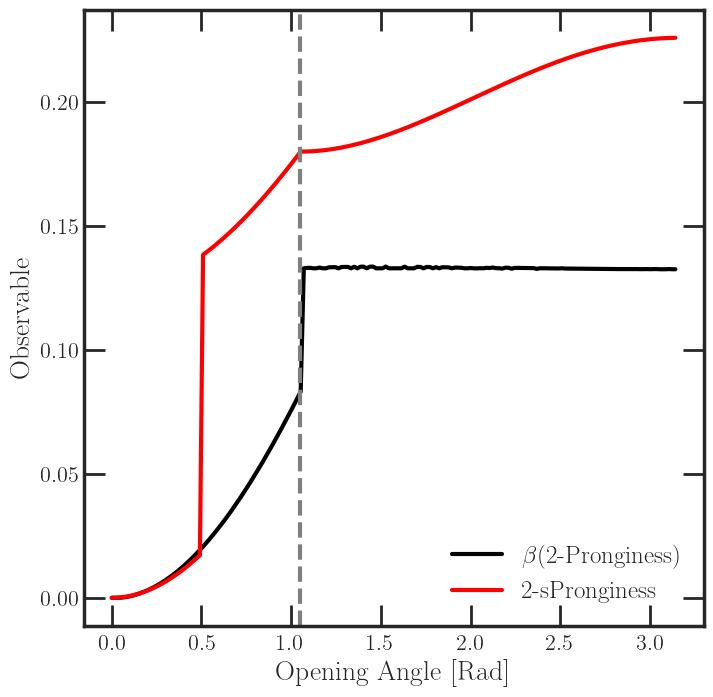

In [7]:
angles = np.linspace(0, np.pi, num_angles)

print(EMDs)
print(SEMDs)


plt.plot(angles, 2 * (np.array(EMDs[:,120])), color = "black", label = r"$\beta$(2-Pronginess)")
plt.plot(angles, np.array(SEMDs_new[:,120]), color = "red", label = "2-sPronginess")
plt.axvline(np.pi / 3, color = "grey", ls = "--")
plt.legend(frameon = False)

plt.xlabel("Opening Angle [Rad]")
plt.ylabel("Observable")